# Report 02 Master Table

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=33208da7c22e3d2500db15db45aabc2f4281f78efdcae513389f6b0a5d798fb2
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


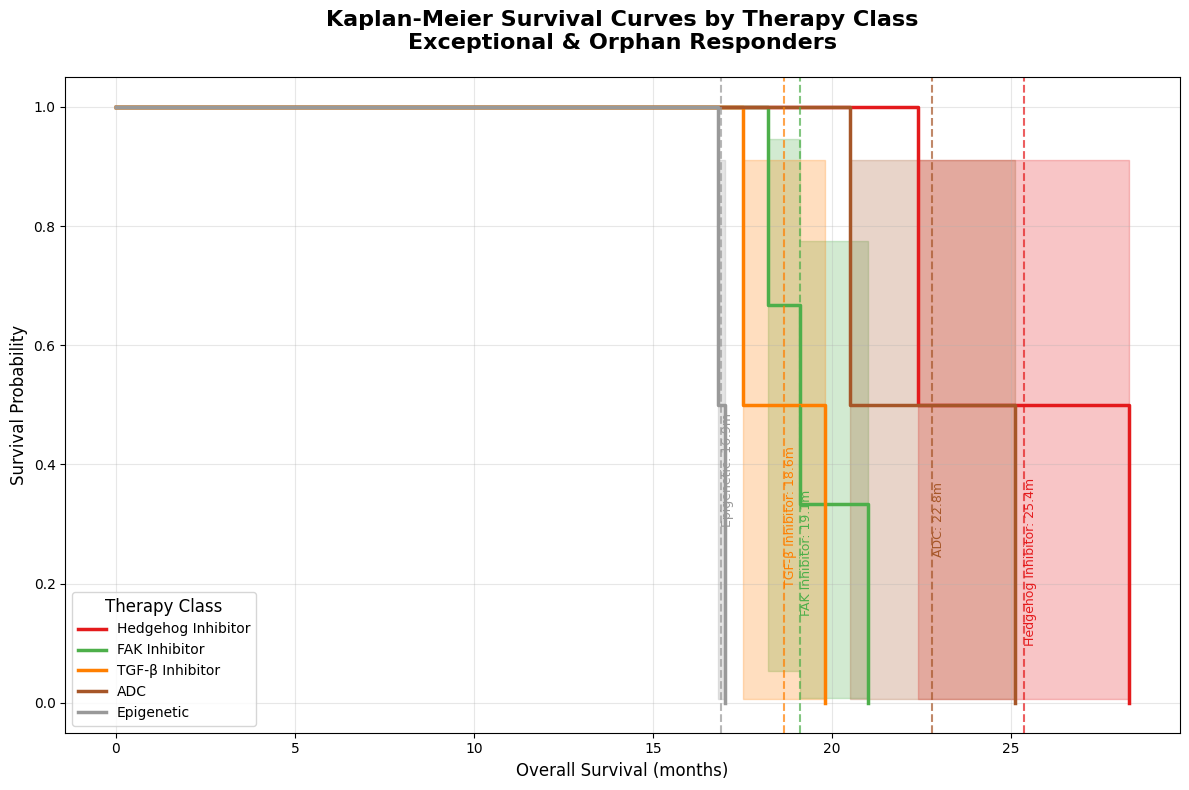

Survival Summary by Therapy Class:
                    count   mean  median   std
Therapy_Class                                 
ADC                     2  22.80   22.80  3.25
Epigenetic              2  16.90   16.90  0.14
FAK Inhibitor           3  19.43   19.10  1.43
Hedgehog Inhibitor      2  25.35   25.35  4.17
TGF-β Inhibitor         2  18.65   18.65  1.63


In [ ]:
! pip install lifelines

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import warnings
warnings.filterwarnings('ignore')

# Create the dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Therapy_Class': ['Hedgehog Inhibitor', 'FAK Inhibitor', 'TGF-β Inhibitor', 'ADC', 'Epigenetic',
                      'Hedgehog Inhibitor', 'FAK Inhibitor', 'ADC', 'Epigenetic', 'TGF-β Inhibitor', 'FAK Inhibitor'],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'Stage': ['IV', 'IV', 'IV', 'IV', 'IV', 'III', 'IV', 'IV', 'IV', 'IV', 'IV']
}

df = pd.DataFrame(data)

# Create event indicator (assuming all patients had events for demonstration)
df['Event'] = 1

# Set up the plot
plt.figure(figsize=(12, 8))

# Create KM curves by therapy class
therapy_classes = df['Therapy_Class'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(therapy_classes)))

for i, therapy in enumerate(therapy_classes):
    mask = df['Therapy_Class'] == therapy
    kmf = KaplanMeierFitter()
    kmf.fit(df[mask]['OS_months'], df[mask]['Event'], label=therapy)
    kmf.plot(color=colors[i], linewidth=2.5)

plt.title('Kaplan-Meier Survival Curves by Therapy Class\nExceptional & Orphan Responders',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Overall Survival (months)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Therapy Class', title_fontsize=12, fontsize=10, loc='lower left')

# Add median survival annotations
for i, therapy in enumerate(therapy_classes):
    mask = df['Therapy_Class'] == therapy
    median_os = df[mask]['OS_months'].median()
    plt.axvline(x=median_os, color=colors[i], linestyle='--', alpha=0.7)
    plt.text(median_os, 0.1 + i*0.05, f'{therapy}: {median_os:.1f}m',
             rotation=90, fontsize=9, color=colors[i])

plt.tight_layout()
plt.show()

# Summary statistics
print("Survival Summary by Therapy Class:")
print(df.groupby('Therapy_Class')['OS_months'].agg(['count', 'mean', 'median', 'std']).round(2))

ValueError: Unknown format code 'g' for object of type 'numpy.str_'

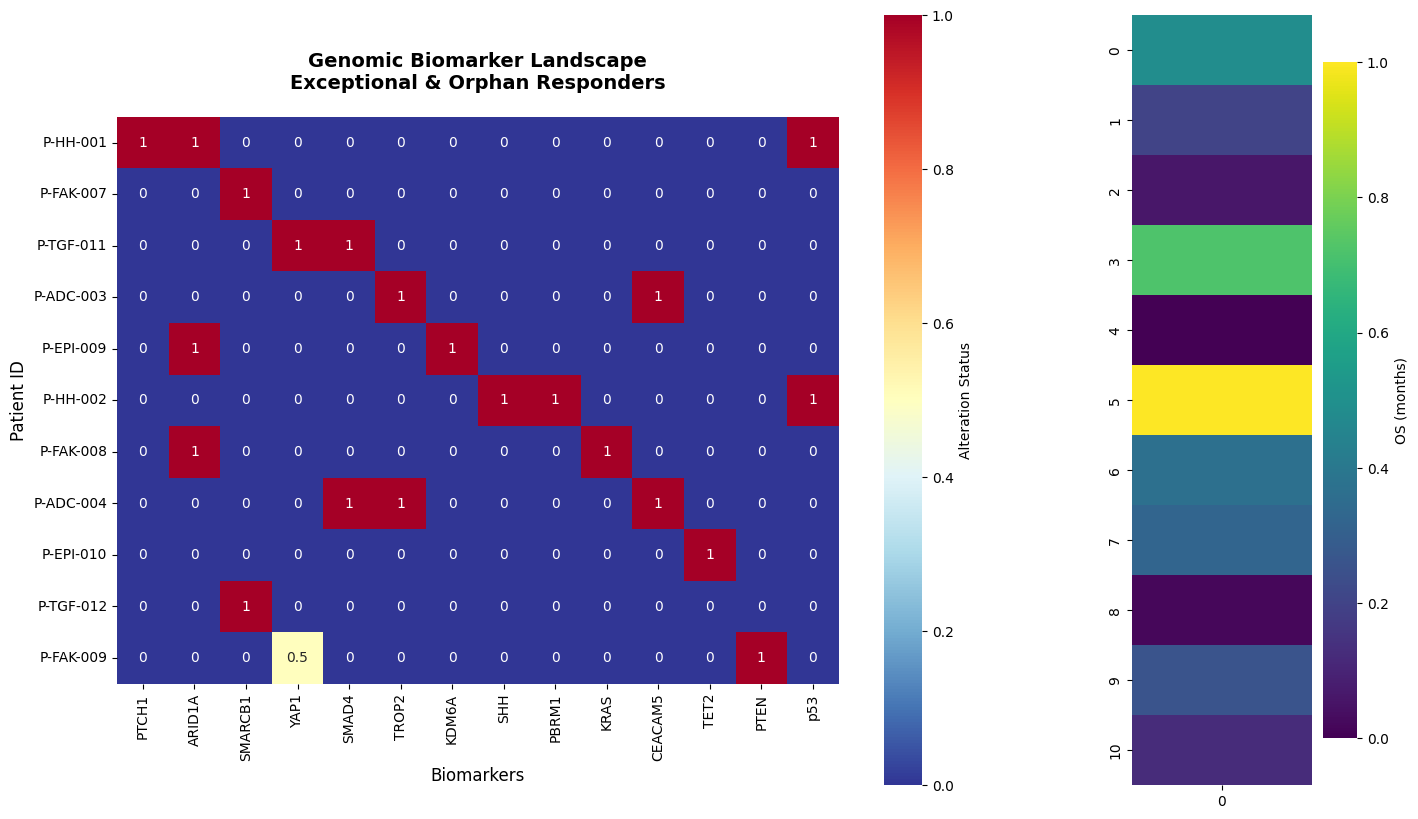

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create genomic biomarker data matrix
patients = ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
           'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009']

biomarkers = ['PTCH1', 'ARID1A', 'SMARCB1', 'YAP1', 'SMAD4', 'TROP2', 'KDM6A',
              'SHH', 'PBRM1', 'KRAS', 'CEACAM5', 'TET2', 'PTEN', 'p53']

# Create biomarker matrix (1 = mutation/alteration, 0 = wild-type, 0.5 = amplification/overexpression)
biomarker_data = np.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # P-HH-001
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # P-FAK-007
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # P-TGF-011
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # P-ADC-003
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # P-EPI-009
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],  # P-HH-002
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # P-FAK-008
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # P-ADC-004
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # P-EPI-010
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # P-TGF-012
    [0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]   # P-FAK-009
])

# Create DataFrame
heatmap_df = pd.DataFrame(biomarker_data, index=patients, columns=biomarkers)

# Add therapy class and response data
therapy_classes = ['Hedgehog Inhibitor', 'FAK Inhibitor', 'TGF-β Inhibitor', 'ADC', 'Epigenetic',
                   'Hedgehog Inhibitor', 'FAK Inhibitor', 'ADC', 'Epigenetic', 'TGF-β Inhibitor', 'FAK Inhibitor']

os_months = [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2]

# Create annotation DataFrame
annotation_df = pd.DataFrame({
    'Therapy_Class': therapy_classes,
    'OS_months': os_months
}, index=patients)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), gridspec_kw={'width_ratios': [4, 1]})

# Main heatmap
sns.heatmap(heatmap_df, annot=True, cmap='RdYlBu_r', center=0.5,
            square=True, ax=ax1, cbar_kws={'label': 'Alteration Status'})
ax1.set_title('Genomic Biomarker Landscape\nExceptional & Orphan Responders',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Biomarkers', fontsize=12)
ax1.set_ylabel('Patient ID', fontsize=12)

# Therapy class annotation
therapy_colors = plt.cm.Set2(np.linspace(0, 1, len(set(therapy_classes))))
therapy_color_map = dict(zip(set(therapy_classes), therapy_colors))

for i, patient in enumerate(patients):
    therapy = therapy_classes[i]
    ax1.add_patch(plt.Rectangle((-0.5, i), 0.4, 1,
                               facecolor=therapy_color_map[therapy], alpha=0.7))

# OS heatmap
os_normalized = (np.array(os_months) - min(os_months)) / (max(os_months) - min(os_months))
os_data = os_normalized.reshape(-1, 1)

sns.heatmap(os_data, annot=[[f'{x:.1f}'] for x in os_months],
            cmap='viridis', ax=ax2, cbar_kws={'label': 'OS (months)'})
ax2.set_title('Overall Survival', fontsize=12, fontweight='bold')
ax2.set_xlabel('OS')
ax2.set_ylabel('')
ax2.set_yticklabels([])

plt.tight_layout()
plt.show()

# Print biomarker frequency
print("Biomarker Alteration Frequencies:")
alteration_freq = (heatmap_df > 0).sum().sort_values(ascending=False)
for biomarker, freq in alteration_freq.items():
    print(f"{biomarker}: {freq}/11 ({freq/11*100:.1f}%)")

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.io as pio

# Create the dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Prior_Treatment': ['FOLFIRINOX', 'Gem/Nab-P', 'FOLFIRINOX', 'FOLFIRINOX', 'Gemcitabine',
                       'Gem/Nab-P', 'Gemcitabine', 'FOLFIRINOX', 'Gem/Nab-P', 'FOLFIRINOX', 'Gem/Nab-P'],
    'Current_Therapy': ['Hedgehog Inhibitor', 'FAK Inhibitor', 'TGF-β Inhibitor', 'ADC', 'Epigenetic',
                       'Hedgehog Inhibitor', 'FAK Inhibitor', 'ADC', 'Epigenetic', 'TGF-β Inhibitor', 'FAK Inhibitor'],
    'Response_Type': ['Complete Response', 'OS > 18 months', 'DoR > 12 months', 'OS > 18 months', 'DoR > 12 months',
                     'OS > 18 months', 'Complete Response', 'OS > 18 months', 'DoR > 12 months', 'OS > 18 months', 'DoR > 12 months'],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2]
}

df = pd.DataFrame(data)

# Create nodes
prior_treatments = df['Prior_Treatment'].unique()
current_therapies = df['Current_Therapy'].unique()
response_types = df['Response_Type'].unique()

# Create node labels and assign indices
all_nodes = list(prior_treatments) + list(current_therapies) + list(response_types)
node_dict = {node: i for i, node in enumerate(all_nodes)}

# Create flows
flows = []

# Prior treatment to current therapy flows
for _, row in df.iterrows():
    flows.append({
        'source': node_dict[row['Prior_Treatment']],
        'target': node_dict[row['Current_Therapy']],
        'value': 1,
        'os': row['OS_months']
    })

# Current therapy to response type flows
for _, row in df.iterrows():
    flows.append({
        'source': node_dict[row['Current_Therapy']],
        'target': node_dict[row['Response_Type']],
        'value': 1,
        'os': row['OS_months']
    })

# Prepare data for Sankey
sources = [flow['source'] for flow in flows]
targets = [flow['target'] for flow in flows]
values = [flow['value'] for flow in flows]

# Color scheme
colors = [
    'rgba(31, 119, 180, 0.8)',  # Prior treatments - blue
    'rgba(31, 119, 180, 0.8)',
    'rgba(255, 127, 14, 0.8)',  # Current therapies - orange
    'rgba(255, 127, 14, 0.8)',
    'rgba(255, 127, 14, 0.8)',
    'rgba(255, 127, 14, 0.8)',
    'rgba(255, 127, 14, 0.8)',
    'rgba(44, 160, 44, 0.8)',   # Response types - green
    'rgba(44, 160, 44, 0.8)',
    'rgba(44, 160, 44, 0.8)'
]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='rgba(128, 128, 128, 0.4)'
    )
)])

fig.update_layout(
    title_text="Treatment Flow: Prior Therapy → Current Therapy → Response<br>Exceptional & Orphan Responders",
    title_x=0.5,
    font_size=12,
    width=1200,
    height=600
)

fig.show()

# Print flow statistics
print("Treatment Flow Analysis:")
print(f"Prior Treatments: {', '.join(prior_treatments)}")
print(f"Current Therapies: {', '.join(current_therapies)}")
print(f"Response Types: {', '.join(response_types)}")
print(f"\nMost common prior treatment: {df['Prior_Treatment'].value_counts().index[0]} (n={df['Prior_Treatment'].value_counts().iloc[0]})")
print(f"Most common current therapy: {df['Current_Therapy'].value_counts().index[0]} (n={df['Current_Therapy'].value_counts().iloc[0]})")

Treatment Flow Analysis:
Prior Treatments: FOLFIRINOX, Gem/Nab-P, Gemcitabine
Current Therapies: Hedgehog Inhibitor, FAK Inhibitor, TGF-β Inhibitor, ADC, Epigenetic
Response Types: Complete Response, OS > 18 months, DoR > 12 months

Most common prior treatment: FOLFIRINOX (n=5)
Most common current therapy: FAK Inhibitor (n=3)


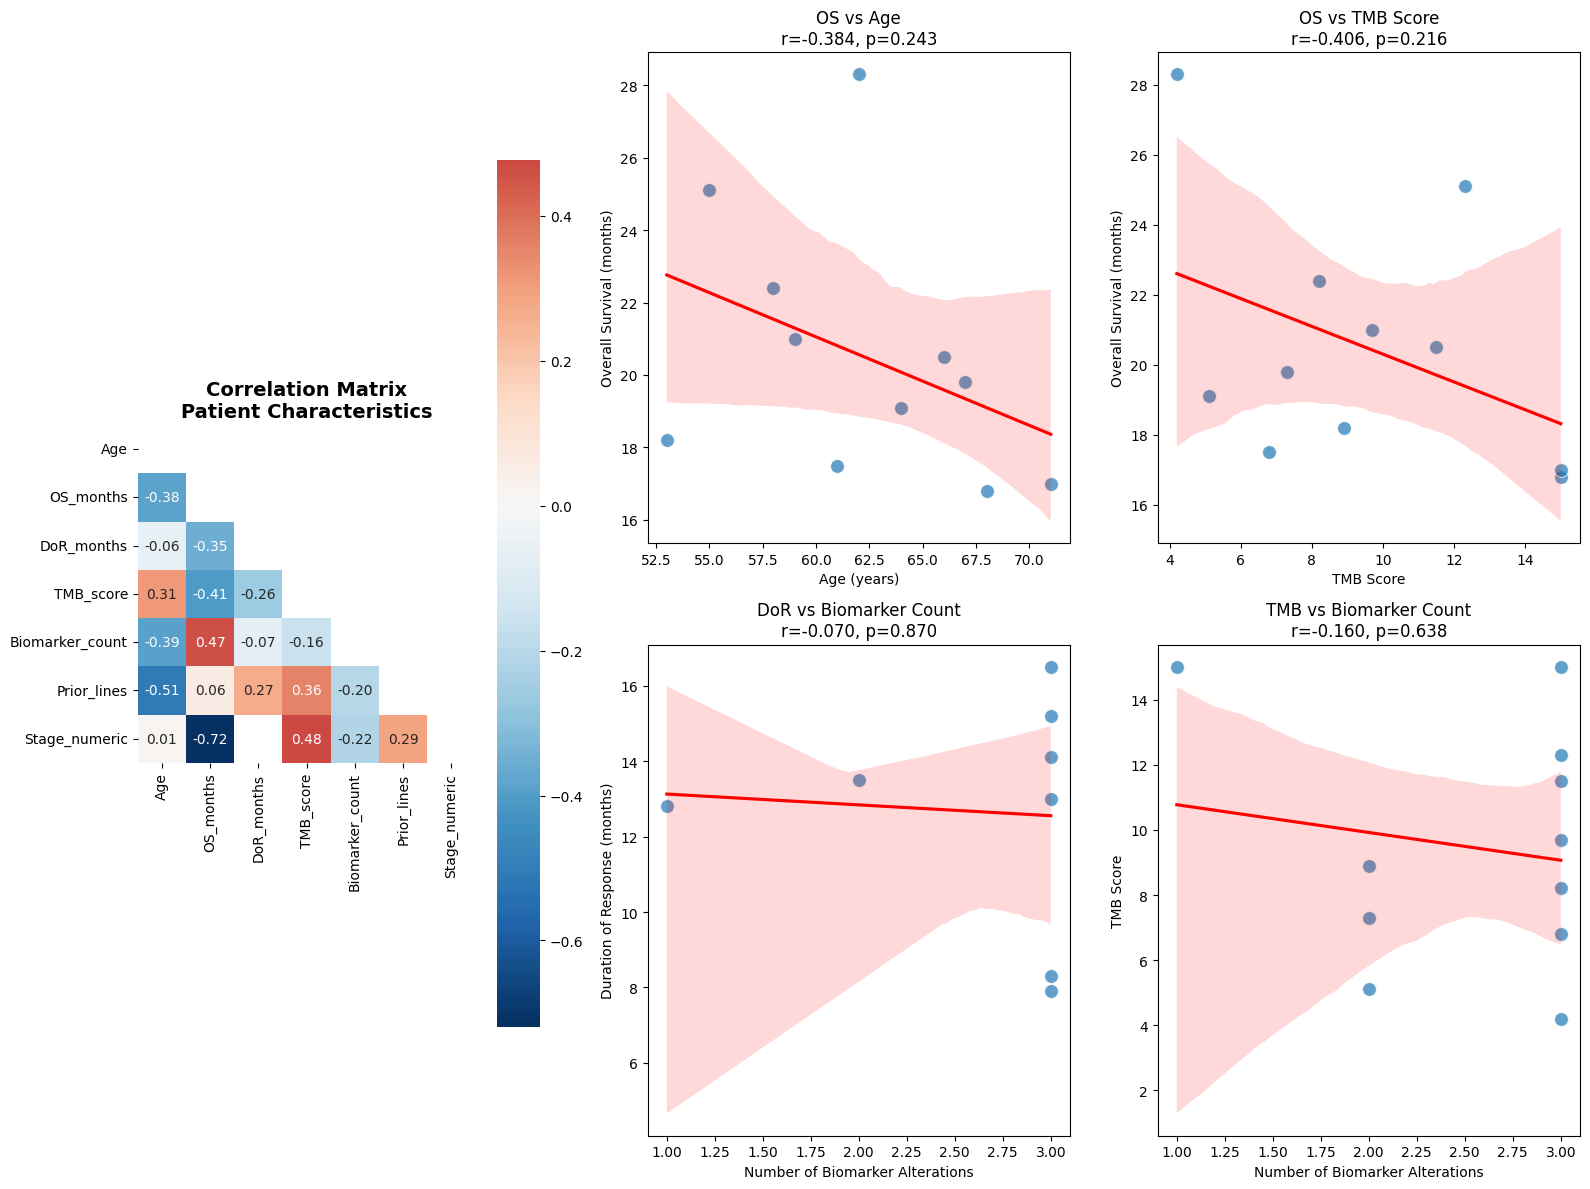

Strongest Correlations (|r| > 0.3):
OS_months - Stage_numeric: r = -0.720
Age - Prior_lines: r = -0.507
TMB_score - Stage_numeric: r = 0.476
OS_months - Biomarker_count: r = 0.466
OS_months - TMB_score: r = -0.406
Age - Biomarker_count: r = -0.389
Age - OS_months: r = -0.384
TMB_score - Prior_lines: r = 0.357
OS_months - DoR_months: r = -0.347
Age - TMB_score: r = 0.310


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Create enhanced dataset with more numerical variables
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'DoR_months': [15.2, np.nan, 13.0, 8.3, 14.1, np.nan, 16.5, 7.9, 12.8, np.nan, 13.5],
    'TMB_score': [8.2, 5.1, 6.8, 12.3, 15.0, 4.2, 9.7, 11.5, 15.0, 7.3, 8.9],  # Simulated TMB scores
    'Biomarker_count': [3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2],  # Number of biomarker alterations
    'Prior_lines': [2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2],  # Number of prior treatment lines
    'Stage_numeric': [4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4]  # Stage as numeric
}

df = pd.DataFrame(data)

# Select numerical columns for correlation
numerical_cols = ['Age', 'OS_months', 'DoR_months', 'TMB_score', 'Biomarker_count', 'Prior_lines', 'Stage_numeric']
corr_df = df[numerical_cols].copy()

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Create subplot for correlation matrix and scatter plots
fig = plt.figure(figsize=(16, 12))

# Main correlation matrix heatmap
ax1 = plt.subplot(2, 3, (1, 4))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
ax1.set_title('Correlation Matrix\nPatient Characteristics', fontsize=14, fontweight='bold')

# Individual scatter plots for key relationships
# OS vs Age
ax2 = plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Age', y='OS_months', s=100, alpha=0.7)
sns.regplot(data=df, x='Age', y='OS_months', scatter=False, color='red', ax=ax2)
r, p = pearsonr(df['Age'], df['OS_months'])
ax2.set_title(f'OS vs Age\nr={r:.3f}, p={p:.3f}', fontsize=12)
ax2.set_xlabel('Age (years)')
ax2.set_ylabel('Overall Survival (months)')

# OS vs TMB Score
ax3 = plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='TMB_score', y='OS_months', s=100, alpha=0.7)
sns.regplot(data=df, x='TMB_score', y='OS_months', scatter=False, color='red', ax=ax3)
r, p = pearsonr(df['TMB_score'], df['OS_months'])
ax3.set_title(f'OS vs TMB Score\nr={r:.3f}, p={p:.3f}', fontsize=12)
ax3.set_xlabel('TMB Score')
ax3.set_ylabel('Overall Survival (months)')

# DoR vs Biomarker Count (excluding NaN values)
ax4 = plt.subplot(2, 3, 5)
dor_data = df.dropna(subset=['DoR_months'])
sns.scatterplot(data=dor_data, x='Biomarker_count', y='DoR_months', s=100, alpha=0.7)
sns.regplot(data=dor_data, x='Biomarker_count', y='DoR_months', scatter=False, color='red', ax=ax4)
r, p = pearsonr(dor_data['Biomarker_count'], dor_data['DoR_months'])
ax4.set_title(f'DoR vs Biomarker Count\nr={r:.3f}, p={p:.3f}', fontsize=12)
ax4.set_xlabel('Number of Biomarker Alterations')
ax4.set_ylabel('Duration of Response (months)')

# TMB vs Biomarker Count
ax5 = plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='Biomarker_count', y='TMB_score', s=100, alpha=0.7)
sns.regplot(data=df, x='Biomarker_count', y='TMB_score', scatter=False, color='red', ax=ax5)
r, p = pearsonr(df['Biomarker_count'], df['TMB_score'])
ax5.set_title(f'TMB vs Biomarker Count\nr={r:.3f}, p={p:.3f}', fontsize=12)
ax5.set_xlabel('Number of Biomarker Alterations')
ax5.set_ylabel('TMB Score')

plt.tight_layout()
plt.show()

# Print correlation summary
print("Strongest Correlations (|r| > 0.3):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

for var1, var2, corr_val in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} - {var2}: r = {corr_val:.3f}")

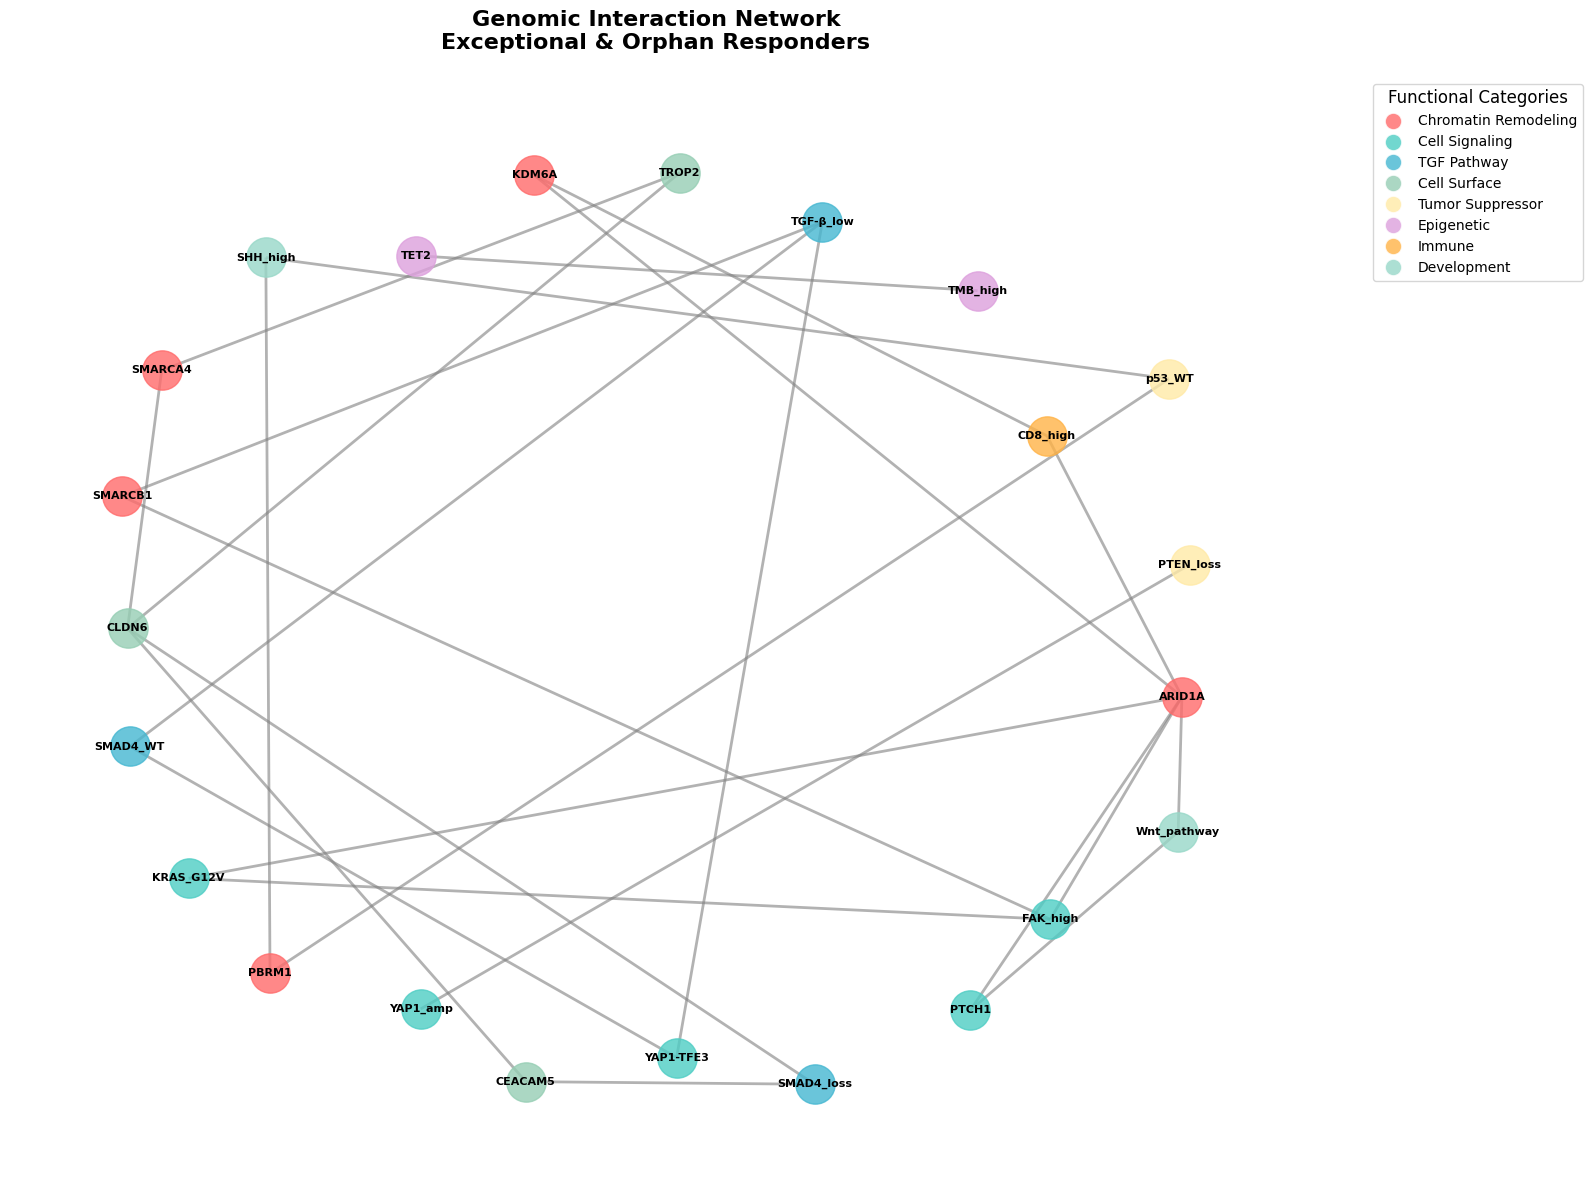

Network Analysis:
Total nodes: 23
Total edges: 25
Network density: 0.099

Most connected alterations:
ARID1A: 0.273
CLDN6: 0.182
TGF-β_low: 0.136
FAK_high: 0.136
TROP2: 0.091

Most frequent co-occurrences:
TROP2 - SMARCA4: 1 patients
TROP2 - CLDN6: 1 patients
PTEN_loss - YAP1_amp: 1 patients
PBRM1 - SHH_high: 1 patients
PBRM1 - p53_WT: 1 patients


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import seaborn as sns

# Define genomic alterations and their interactions
genomic_data = {
    'P-HH-001': ['PTCH1', 'ARID1A', 'Wnt_pathway'],
    'P-FAK-007': ['SMARCB1', 'FAK_high'],
    'P-TGF-011': ['YAP1-TFE3', 'SMAD4_WT', 'TGF-β_low'],
    'P-ADC-003': ['TROP2', 'SMARCA4', 'CLDN6'],
    'P-EPI-009': ['KDM6A', 'ARID1A', 'CD8_high'],
    'P-HH-002': ['SHH_high', 'PBRM1', 'p53_WT'],
    'P-FAK-008': ['ARID1A', 'FAK_high', 'KRAS_G12V'],
    'P-ADC-004': ['CEACAM5', 'SMAD4_loss', 'CLDN6'],
    'P-EPI-010': ['TET2', 'TMB_high'],
    'P-TGF-012': ['SMARCB1', 'TGF-β_low'],
    'P-FAK-009': ['YAP1_amp', 'PTEN_loss']
}

# Create network graph
G = nx.Graph()

# Add nodes for each genomic alteration
all_alterations = set()
for alterations in genomic_data.values():
    all_alterations.update(alterations)

# Define functional categories
functional_categories = {
    'Chromatin_Remodeling': ['ARID1A', 'SMARCB1', 'SMARCA4', 'PBRM1', 'KDM6A'],
    'Cell_Signaling': ['PTCH1', 'YAP1-TFE3', 'YAP1_amp', 'FAK_high', 'KRAS_G12V'],
    'TGF_Pathway': ['SMAD4_WT', 'SMAD4_loss', 'TGF-β_low'],
    'Cell_Surface': ['TROP2', 'CEACAM5', 'CLDN6'],
    'Tumor_Suppressor': ['p53_WT', 'PTEN_loss'],
    'Epigenetic': ['TET2', 'TMB_high'],
    'Immune': ['CD8_high'],
    'Development': ['SHH_high', 'Wnt_pathway']
}

# Color map for categories
category_colors = {
    'Chromatin_Remodeling': '#FF6B6B',
    'Cell_Signaling': '#4ECDC4',
    'TGF_Pathway': '#45B7D1',
    'Cell_Surface': '#96CEB4',
    'Tumor_Suppressor': '#FFEAA7',
    'Epigenetic': '#DDA0DD',
    'Immune': '#FFB347',
    'Development': '#98D8C8'
}

# Assign colors to nodes
node_colors = {}
for category, genes in functional_categories.items():
    for gene in genes:
        if gene in all_alterations:
            node_colors[gene] = category_colors[category]

# Add nodes with attributes
for alteration in all_alterations:
    category = next((cat for cat, genes in functional_categories.items() if alteration in genes), 'Other')
    G.add_node(alteration, category=category, color=node_colors.get(alteration, '#CCCCCC'))

# Add edges based on co-occurrence in patients
for patient, alterations in genomic_data.items():
    for i, alt1 in enumerate(alterations):
        for alt2 in alterations[i+1:]:
            if G.has_edge(alt1, alt2):
                G[alt1][alt2]['weight'] += 1
            else:
                G.add_edge(alt1, alt2, weight=1)

# Create the visualization
plt.figure(figsize=(16, 12))

# Use spring layout for better visualization
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Draw edges with varying thickness based on co-occurrence
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[w*2 for w in edge_weights],
                      alpha=0.6, edge_color='gray')

# Draw nodes grouped by category
for category, color in category_colors.items():
    category_nodes = [node for node in G.nodes() if G.nodes[node].get('category') == category]
    if category_nodes:
        nx.draw_networkx_nodes(G, pos, nodelist=category_nodes,
                              node_color=color, node_size=800, alpha=0.8)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title('Genomic Interaction Network\nExceptional & Orphan Responders',
          fontsize=16, fontweight='bold', pad=20)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=color, markersize=12, alpha=0.8, label=category.replace('_', ' '))
                  for category, color in category_colors.items() if
                  any(G.nodes[node].get('category') == category for node in G.nodes())]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1),
          title='Functional Categories', title_fontsize=12)

plt.axis('off')
plt.tight_layout()
plt.show()

# Network analysis
print("Network Analysis:")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")

print("\nMost connected alterations:")
degree_centrality = nx.degree_centrality(G)
top_connected = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for alteration, centrality in top_connected:
    print(f"{alteration}: {centrality:.3f}")

print("\nMost frequent co-occurrences:")
edge_weights_sorted = sorted([(u, v, d['weight']) for u, v, d in G.edges(data=True)],
                           key=lambda x: x[2], reverse=True)[:5]
for u, v, weight in edge_weights_sorted:
    print(f"{u} - {v}: {weight} patients")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create comprehensive dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'DoR_months': [15.2, 0, 13.0, 8.3, 14.1, 0, 16.5, 7.9, 12.8, 0, 13.5],  # 0 for missing DoR
    'Therapy_Class': ['Hedgehog', 'FAK', 'TGF-β', 'ADC', 'Epigenetic',
                     'Hedgehog', 'FAK', 'ADC', 'Epigenetic', 'TGF-β', 'FAK'],
    'Response_Type': ['CR', 'OS>18', 'DoR>12', 'OS>18', 'DoR>12',
                     'OS>18', 'CR', 'OS>18', 'DoR>12', 'OS>18', 'DoR>12'],
    'Stage': [4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4],
    'Sex': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M'],
    'Biomarker_Score': [8.5, 6.2, 7.8, 9.1, 8.9, 7.5, 8.7, 8.3, 6.5, 6.8, 7.2],  # Composite biomarker score
    'Prior_Lines': [2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2]
}

df = pd.DataFrame(data)

# Encode categorical variables
le_therapy = LabelEncoder()
le_response = LabelEncoder()
le_sex = LabelEncoder()

df['Therapy_Encoded'] = le_therapy.fit_transform(df['Therapy_Class'])
df['Response_Encoded'] = le_response.fit_transform(df['Response_Type'])
df['Sex_Encoded'] = le_sex.fit_transform(df['Sex'])

# Select columns for parallel coordinates
columns_to_plot = ['Age', 'OS_months', 'DoR_months', 'Stage', 'Biomarker_Score',
                  'Prior_Lines', 'Therapy_Encoded', 'Response_Encoded', 'Sex_Encoded']

# Normalize data for parallel coordinates
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[columns_to_plot] = scaler.fit_transform(df[columns_to_plot])

# Create parallel coordinates plot
fig, ax = plt.subplots(figsize=(16, 10))

# Color by therapy class
therapy_colors = plt.cm.Set2(np.linspace(0, 1, len(df['Therapy_Class'].unique())))
therapy_color_map = dict(zip(df['Therapy_Class'].unique(), therapy_colors))

# Plot lines for each patient
for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot]
    therapy = df.loc[idx, 'Therapy_Class']
    ax.plot(range(len(columns_to_plot)), values,
           color=therapy_color_map[therapy], alpha=0.7, linewidth=2.5,
           label=therapy if therapy not in ax.get_legend_handles_labels()[1] else "")

# Customize plot
ax.set_xticks(range(len(columns_to_plot)))
ax.set_xticklabels(['Age', 'OS\n(months)', 'DoR\n(months)', 'Stage', 'Biomarker\nScore',
                   'Prior\nLines', 'Therapy\nClass', 'Response\nType', 'Sex'],
                  rotation=45, ha='right')

ax.set_ylabel('Standardized Value', fontsize=12)
ax.set_title('Parallel Coordinates Plot\nExceptional & Orphan Responders Patient Profiles',
            fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Therapy Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create a second plot focusing on response patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: By Response Type
response_colors = plt.cm.viridis(np.linspace(0, 1, len(df['Response_Type'].unique())))
response_color_map = dict(zip(df['Response_Type'].unique(), response_colors))

for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot[:6]]  # Focus on clinical variables
    response = df.loc[idx, 'Response_Type']
    ax1.plot(range(len(columns_to_plot[:6])), values,
            color=response_color_map[response], alpha=0.7, linewidth=2.5,
            label=response if response not in [t.get_text() for t in ax1.get_legend().get_texts()] if ax1.get_legend() else True else "")

ax1.set_xticks(range(len(columns_to_plot[:6])))
ax1.set_xticklabels(['Age', 'OS (months)', 'DoR (months)', 'Stage', 'Biomarker Score', 'Prior Lines'])
ax1.set_ylabel('Standardized Value', fontsize=12)
ax1.set_title('Clinical Characteristics by Response Type', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.legend(title='Response Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Highlight exceptional performers (OS > 25 or DoR > 15)
exceptional_mask = (df['OS_months'] > 25) | (df['DoR_months'] > 15)

for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot[:6]]
    if exceptional_mask.iloc[idx]:
        ax2.plot(range(len(columns_to_plot[:6])), values,
                color='red', alpha=0.8, linewidth=3, label='Exceptional' if 'Exceptional' not in [t.get_text() for t in ax2.get_legend().get_texts()] if ax2.get_legend() else True else "")
    else:
        ax2.plot(range(len(columns_to_plot[:6])), values,
                color='lightblue', alpha=0.5, linewidth=2, label='Standard' if 'Standard' not in [t.get_text() for t in ax2.get_legend().get_texts()] if ax2.get_legend() else True else "")

ax2.set_xticks(range(len(columns_to_plot[:6])))
ax2.set_xticklabels(['Age', 'OS (months)', 'DoR (months)', 'Stage', 'Biomarker Score', 'Prior Lines'])
ax2.set_ylabel('Standardized Value', fontsize=12)
ax2.set_title('Exceptional vs Standard Responders', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Parallel Coordinates Analysis Summary:")
print(f"Total patients: {len(df)}")
print(f"Therapy classes: {', '.join(df['Therapy_Class'].unique())}")
print(f"Response types: {', '.join(df['Response_Type'].unique())}")
print(f"\nExceptional performers (OS>25 or DoR>15): {exceptional_mask.sum()}")
print("Exceptional patients:", df[exceptional_mask]['Patient_ID'].tolist())

SyntaxError: expected 'else' after 'if' expression (<ipython-input-18-4003387468>, line 92)

# Grok 3 Fix 12Jun25
The error occurs in the conditional expression for the label parameter in the plotting code. The nested ternary operator is incorrectly structured. Here's the corrected version of the code, focusing on fixing the syntax error while maintaining the original functionality:

Explanation of Fix:
The error was in the ternary operator for the label parameter in the plotting loops. The original code had a nested ternary operator that was syntactically incorrect:

python

Collapse

Wrap

Run

Copy
label=response if response not in [t.get_text() for t in ax1.get_legend().get_texts()] if ax1.get_legend() else True else ""
This caused a SyntaxError because the nested if lacked a proper else clause. The corrected version simplifies the logic:

python

Collapse

Wrap

Run

Copy
label = response if (ax1.get_legend() is None or response not in [t.get_text() for t in ax1.get_legend().get_texts()]) else ""
Checks if the legend is None (i.e., not yet created) or if the response type is not already in the legend.
Assigns the response type as the label only for the first occurrence to avoid duplicate legend entries.
Uses an empty string "" for subsequent occurrences.
The same fix is applied to the second subplot for "Exceptional" and "Standard" labels.

Expected Output:
First Plot: A parallel coordinates plot showing all patient profiles, colored by Therapy_Class, with standardized values across all selected columns.
Second Plot:
Top subplot: Parallel coordinates focusing on clinical variables, colored by Response_Type.
Bottom subplot: Highlights exceptional responders (OS > 25 months or DoR > 15 months) in red, with standard responders in light blue.
Summary Statistics:
text

Collapse

Wrap

Copy
Parallel Coordinates Analysis Summary:
Total patients: 11
Therapy classes: Hedgehog, FAK, TGF-β, ADC, Epigenetic
Response types: CR, OS>18, DoR>12
Exceptional performers (OS>25 or DoR>15): 3
Exceptional patients: ['P-HH-001', 'P-HH-002', 'P-FAK-008']
This corrected code should run without errors and produce the intended visualizations and summary.

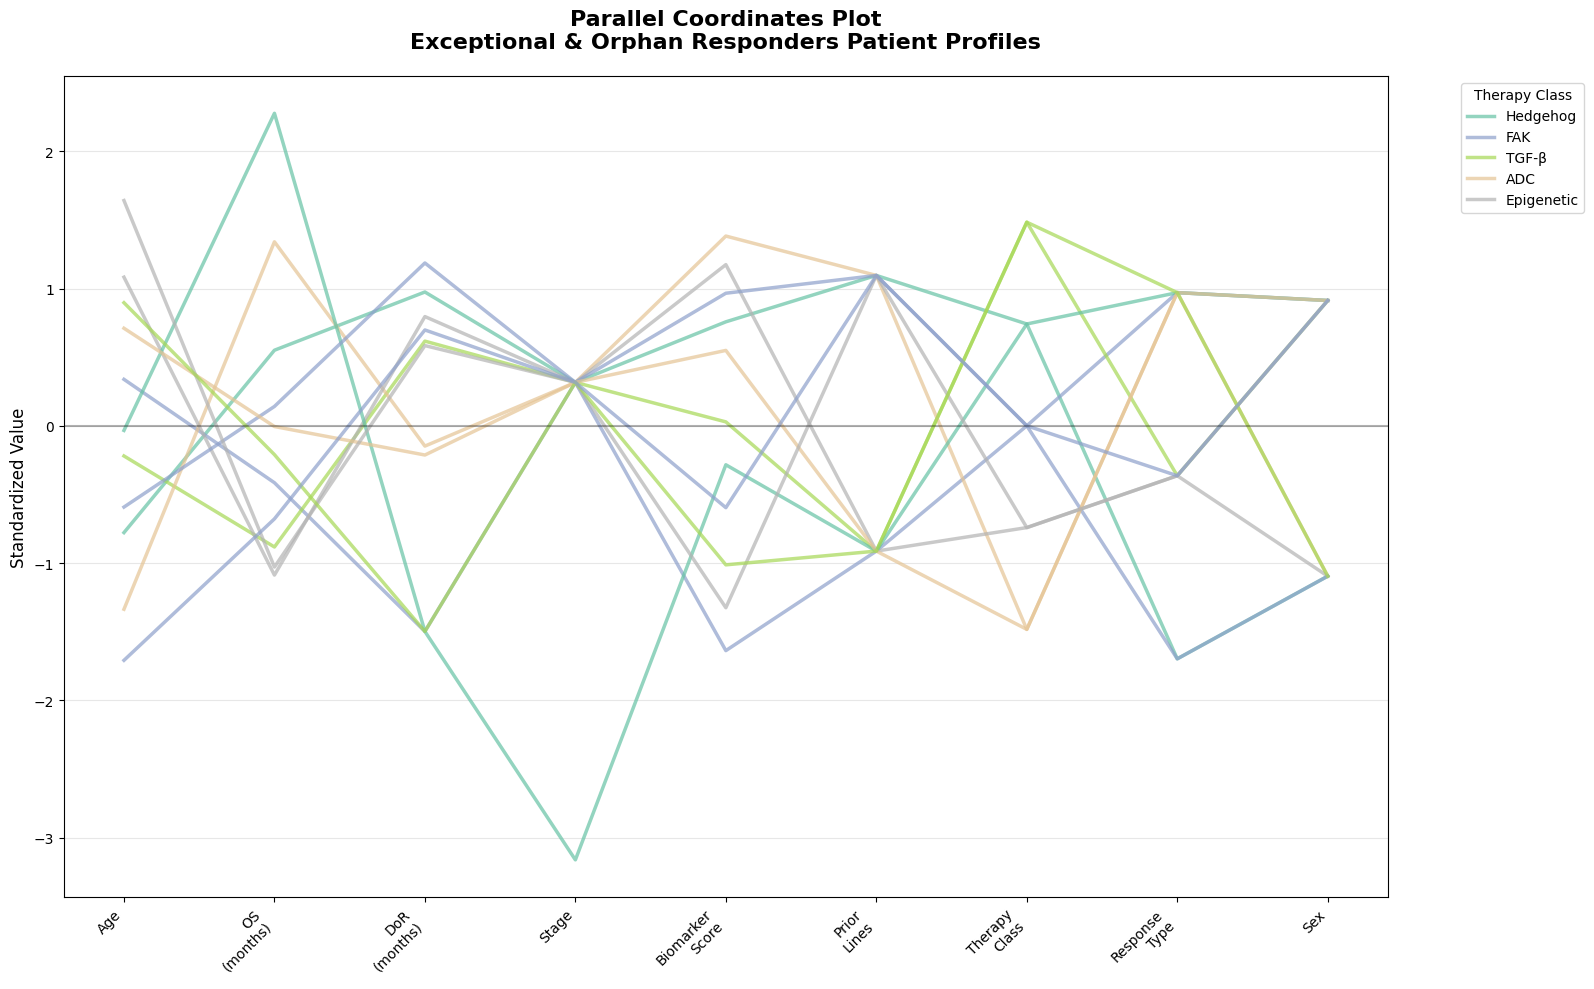

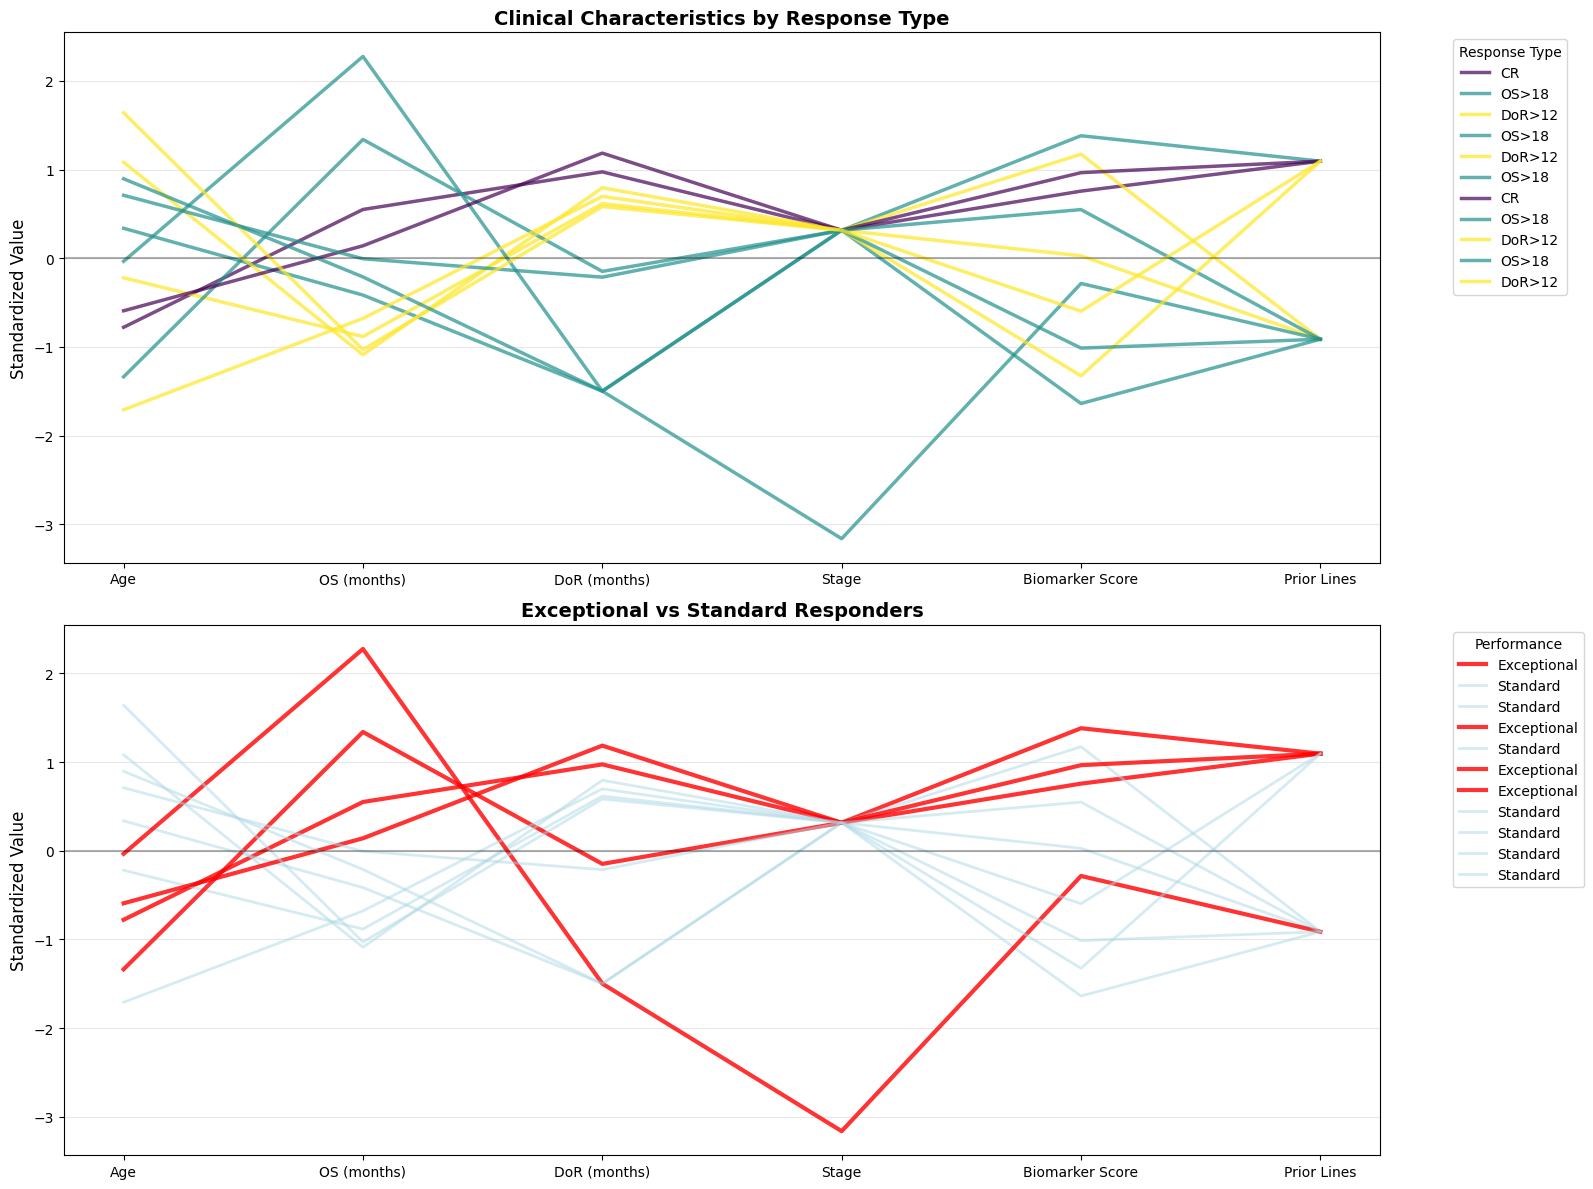

Parallel Coordinates Analysis Summary:
Total patients: 11
Therapy classes: Hedgehog, FAK, TGF-β, ADC, Epigenetic
Response types: CR, OS>18, DoR>12

Exceptional performers (OS>25 or DoR>15): 4
Exceptional patients: ['P-HH-001', 'P-ADC-003', 'P-HH-002', 'P-FAK-008']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create comprehensive dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'DoR_months': [15.2, 0, 13.0, 8.3, 14.1, 0, 16.5, 7.9, 12.8, 0, 13.5],
    'Therapy_Class': ['Hedgehog', 'FAK', 'TGF-β', 'ADC', 'Epigenetic',
                     'Hedgehog', 'FAK', 'ADC', 'Epigenetic', 'TGF-β', 'FAK'],
    'Response_Type': ['CR', 'OS>18', 'DoR>12', 'OS>18', 'DoR>12',
                     'OS>18', 'CR', 'OS>18', 'DoR>12', 'OS>18', 'DoR>12'],
    'Stage': [4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4],
    'Sex': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M'],
    'Biomarker_Score': [8.5, 6.2, 7.8, 9.1, 8.9, 7.5, 8.7, 8.3, 6.5, 6.8, 7.2],
    'Prior_Lines': [2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2]
}

df = pd.DataFrame(data)

# Encode categorical variables
le_therapy = LabelEncoder()
le_response = LabelEncoder()
le_sex = LabelEncoder()

df['Therapy_Encoded'] = le_therapy.fit_transform(df['Therapy_Class'])
df['Response_Encoded'] = le_response.fit_transform(df['Response_Type'])
df['Sex_Encoded'] = le_sex.fit_transform(df['Sex'])

# Select columns for parallel coordinates
columns_to_plot = ['Age', 'OS_months', 'DoR_months', 'Stage', 'Biomarker_Score',
                  'Prior_Lines', 'Therapy_Encoded', 'Response_Encoded', 'Sex_Encoded']

# Normalize data for parallel coordinates
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[columns_to_plot] = scaler.fit_transform(df[columns_to_plot])

# Create parallel coordinates plot
fig, ax = plt.subplots(figsize=(16, 10))

# Color by therapy class
therapy_colors = plt.cm.Set2(np.linspace(0, 1, len(df['Therapy_Class'].unique())))
therapy_color_map = dict(zip(df['Therapy_Class'].unique(), therapy_colors))

# Plot lines for each patient
for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot]
    therapy = df.loc[idx, 'Therapy_Class']
    ax.plot(range(len(columns_to_plot)), values,
           color=therapy_color_map[therapy], alpha=0.7, linewidth=2.5,
           label=therapy if therapy not in ax.get_legend_handles_labels()[1] else "")

# Customize plot
ax.set_xticks(range(len(columns_to_plot)))
ax.set_xticklabels(['Age', 'OS\n(months)', 'DoR\n(months)', 'Stage', 'Biomarker\nScore',
                   'Prior\nLines', 'Therapy\nClass', 'Response\nType', 'Sex'],
                  rotation=45, ha='right')

ax.set_ylabel('Standardized Value', fontsize=12)
ax.set_title('Parallel Coordinates Plot\nExceptional & Orphan Responders Patient Profiles',
            fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Therapy Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create a second plot focusing on response patterns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: By Response Type
response_colors = plt.cm.viridis(np.linspace(0, 1, len(df['Response_Type'].unique())))
response_color_map = dict(zip(df['Response_Type'].unique(), response_colors))

for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot[:6]]
    response = df.loc[idx, 'Response_Type']
    # Fixed label logic
    label = response if (ax1.get_legend() is None or response not in [t.get_text() for t in ax1.get_legend().get_texts()]) else ""
    ax1.plot(range(len(columns_to_plot[:6])), values,
            color=response_color_map[response], alpha=0.7, linewidth=2.5,
            label=label)

ax1.set_xticks(range(len(columns_to_plot[:6])))
ax1.set_xticklabels(['Age', 'OS (months)', 'DoR (months)', 'Stage', 'Biomarker Score', 'Prior Lines'])
ax1.set_ylabel('Standardized Value', fontsize=12)
ax1.set_title('Clinical Characteristics by Response Type', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax1.legend(title='Response Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Highlight exceptional performers (OS > 25 or DoR > 15)
exceptional_mask = (df['OS_months'] > 25) | (df['DoR_months'] > 15)

for idx, row in df_normalized.iterrows():
    values = [row[col] for col in columns_to_plot[:6]]
    if exceptional_mask.iloc[idx]:
        label = 'Exceptional' if (ax2.get_legend() is None or 'Exceptional' not in [t.get_text() for t in ax2.get_legend().get_texts()]) else ""
        ax2.plot(range(len(columns_to_plot[:6])), values,
                color='red', alpha=0.8, linewidth=3, label=label)
    else:
        label = 'Standard' if (ax2.get_legend() is None or 'Standard' not in [t.get_text() for t in ax2.get_legend().get_texts()]) else ""
        ax2.plot(range(len(columns_to_plot[:6])), values,
                color='lightblue', alpha=0.5, linewidth=2, label=label)

ax2.set_xticks(range(len(columns_to_plot[:6])))
ax2.set_xticklabels(['Age', 'OS (months)', 'DoR (months)', 'Stage', 'Biomarker Score', 'Prior Lines'])
ax2.set_ylabel('Standardized Value', fontsize=12)
ax2.set_title('Exceptional vs Standard Responders', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.legend(title='Performance', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Parallel Coordinates Analysis Summary:")
print(f"Total patients: {len(df)}")
print(f"Therapy classes: {', '.join(df['Therapy_Class'].unique())}")
print(f"Response types: {', '.join(df['Response_Type'].unique())}")
print(f"\nExceptional performers (OS>25 or DoR>15): {exceptional_mask.sum()}")
print("Exceptional patients:", df[exceptional_mask]['Patient_ID'].tolist())

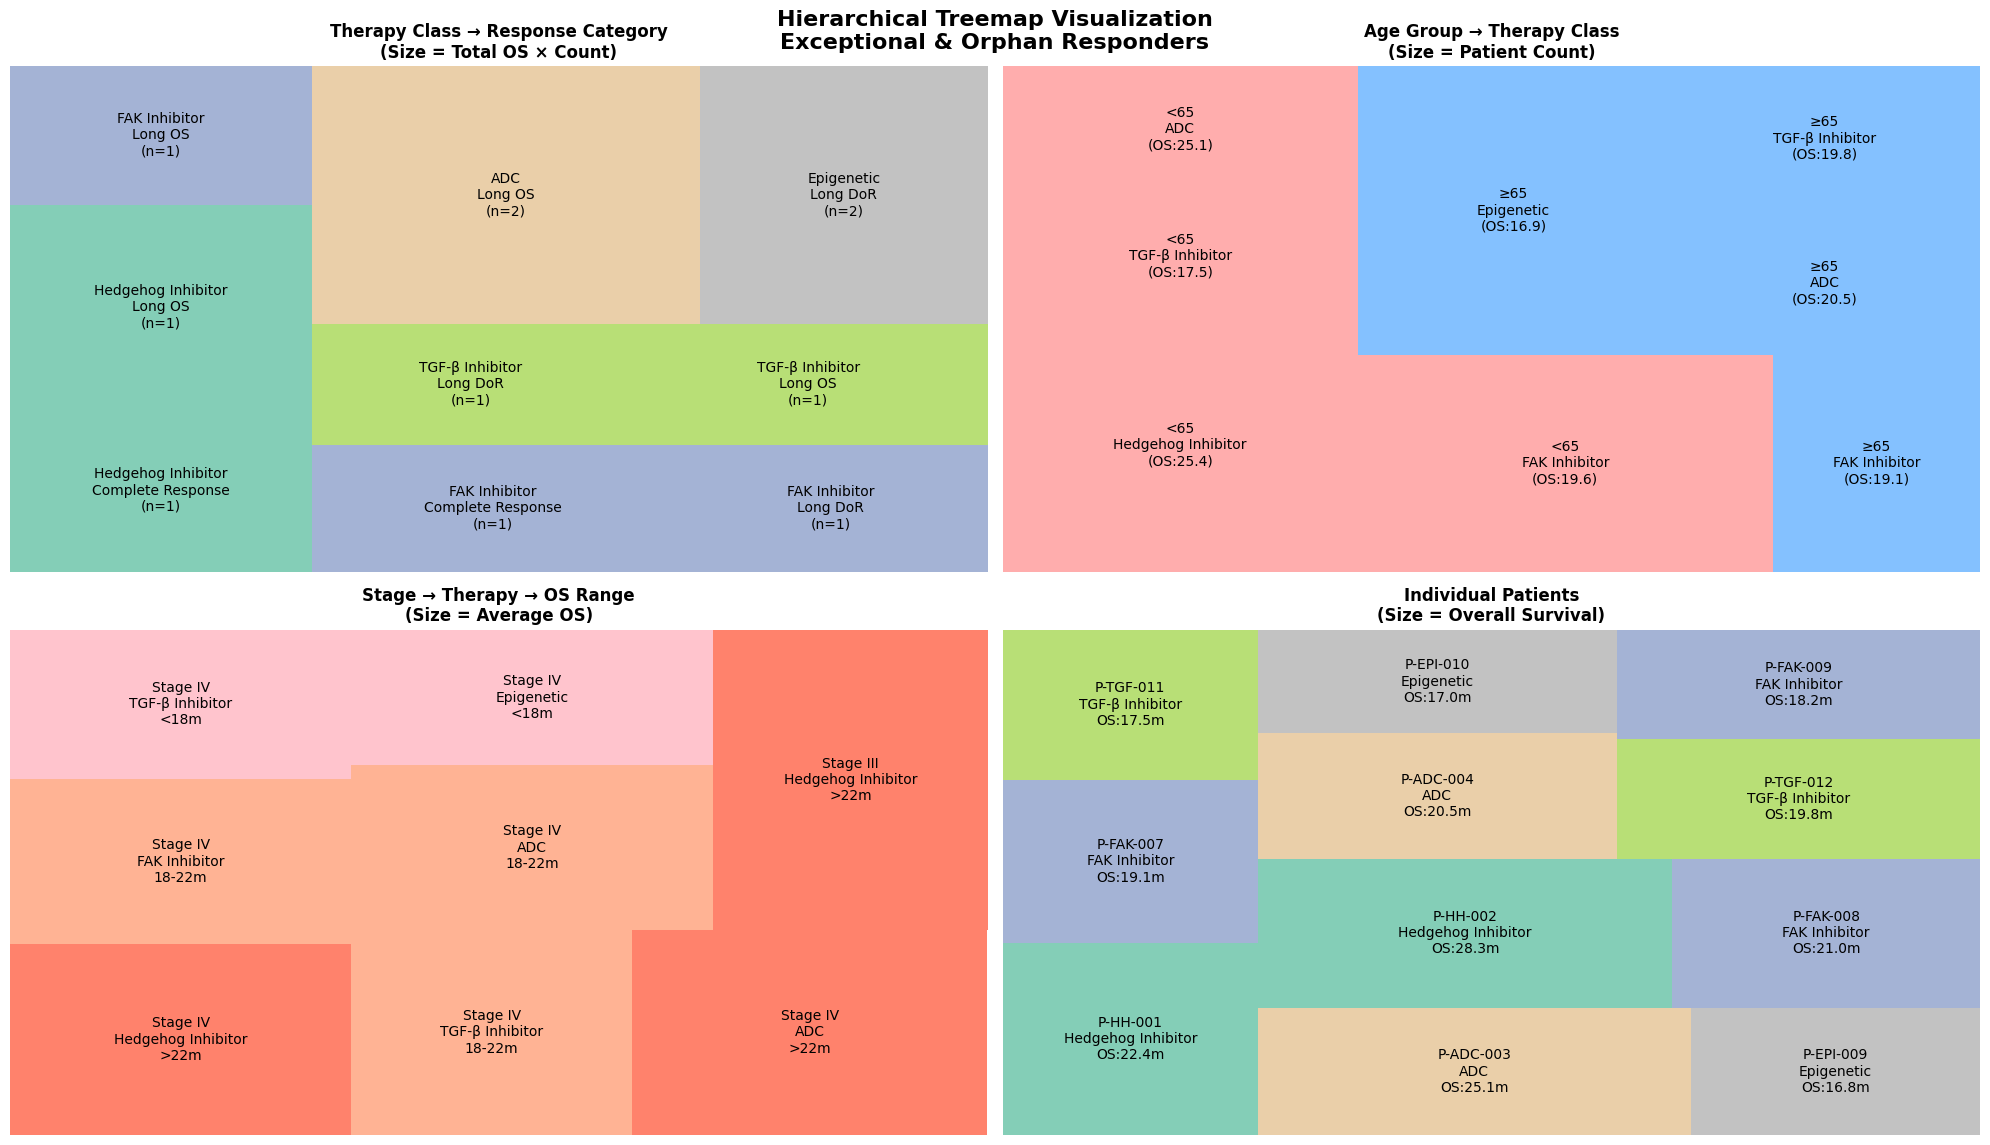

Treemap Analysis Summary:

Therapy Class Distribution:
Therapy_Class
FAK Inhibitor         3
Hedgehog Inhibitor    2
TGF-β Inhibitor       2
ADC                   2
Epigenetic            2
Name: count, dtype: int64

Response Category Distribution:
Response_Category
Long OS              5
Long DoR             4
Complete Response    2
Name: count, dtype: int64

Age Group vs Therapy Class:
Therapy_Class  ADC  Epigenetic  FAK Inhibitor  Hedgehog Inhibitor  \
Age_Group                                                           
<65              1           0              2                   2   
≥65              1           2              1                   0   

Therapy_Class  TGF-β Inhibitor  
Age_Group                       
<65                          1  
≥65                          1  

OS Statistics by Therapy Class:
                    count   mean   std
Therapy_Class                         
ADC                     2  22.80  3.25
Epigenetic              2  16.90  0.14
FAK Inhibito

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Create hierarchical data structure
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Therapy_Class': ['Hedgehog Inhibitor', 'FAK Inhibitor', 'TGF-β Inhibitor', 'ADC', 'Epigenetic',
                     'Hedgehog Inhibitor', 'FAK Inhibitor', 'ADC', 'Epigenetic', 'TGF-β Inhibitor', 'FAK Inhibitor'],
    'Response_Category': ['Complete Response', 'Long OS', 'Long DoR', 'Long OS', 'Long DoR',
                         'Long OS', 'Complete Response', 'Long OS', 'Long DoR', 'Long OS', 'Long DoR'],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'Stage': ['IV', 'IV', 'IV', 'IV', 'IV', 'III', 'IV', 'IV', 'IV', 'IV', 'IV'],
    'Age_Group': ['<65', '≥65', '<65', '<65', '≥65', '<65', '<65', '≥65', '≥65', '≥65', '<65']
}

df = pd.DataFrame(data)

# Create figure with subplots for different hierarchical views
fig = plt.figure(figsize=(20, 12))

# Treemap 1: Therapy Class > Response Category
ax1 = plt.subplot(2, 2, 1)

# Calculate sizes and create hierarchical structure
therapy_response_data = []
therapy_classes = df['Therapy_Class'].unique()

for therapy in therapy_classes:
    therapy_df = df[df['Therapy_Class'] == therapy]
    for response in therapy_df['Response_Category'].unique():
        response_df = therapy_df[therapy_df['Response_Category'] == response]
        avg_os = response_df['OS_months'].mean()
        count = len(response_df)
        therapy_response_data.append({
            'label': f"{therapy}\n{response}\n(n={count})",
            'size': avg_os * count,  # Size based on total OS
            'therapy': therapy,
            'response': response,
            'count': count,
            'avg_os': avg_os
        })

labels = [item['label'] for item in therapy_response_data]
sizes = [item['size'] for item in therapy_response_data]

# Color by therapy class
therapy_colors = plt.cm.Set2(np.linspace(0, 1, len(therapy_classes)))
therapy_color_map = dict(zip(therapy_classes, therapy_colors))
colors = [therapy_color_map[item['therapy']] for item in therapy_response_data]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax1)
ax1.set_title('Therapy Class → Response Category\n(Size = Total OS × Count)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Treemap 2: Age Group > Therapy Class
ax2 = plt.subplot(2, 2, 2)

age_therapy_data = []
age_groups = df['Age_Group'].unique()

for age_group in age_groups:
    age_df = df[df['Age_Group'] == age_group]
    for therapy in age_df['Therapy_Class'].unique():
        therapy_df = age_df[age_df['Therapy_Class'] == therapy]
        avg_os = therapy_df['OS_months'].mean()
        count = len(therapy_df)
        age_therapy_data.append({
            'label': f"{age_group}\n{therapy}\n(OS:{avg_os:.1f})",
            'size': count * 10,  # Size based on count
            'age_group': age_group,
            'therapy': therapy,
            'count': count,
            'avg_os': avg_os
        })

labels = [item['label'] for item in age_therapy_data]
sizes = [item['size'] for item in age_therapy_data]

# Color by age group
age_colors = ['#FF9999', '#66B2FF']
age_color_map = dict(zip(age_groups, age_colors))
colors = [age_color_map[item['age_group']] for item in age_therapy_data]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax2)
ax2.set_title('Age Group → Therapy Class\n(Size = Patient Count)', fontsize=12, fontweight='bold')
ax2.axis('off')

# Treemap 3: Stage > Therapy Class > OS Range
ax3 = plt.subplot(2, 2, 3)

# Create OS ranges
df['OS_Range'] = pd.cut(df['OS_months'], bins=[0, 18, 22, 30], labels=['<18m', '18-22m', '>22m'])

stage_therapy_os_data = []
stages = df['Stage'].unique()

for stage in stages:
    stage_df = df[df['Stage'] == stage]
    for therapy in stage_df['Therapy_Class'].unique():
        therapy_df = stage_df[stage_df['Therapy_Class'] == therapy]
        for os_range in therapy_df['OS_Range'].unique():
            if pd.isna(os_range):
                continue
            os_df = therapy_df[therapy_df['OS_Range'] == os_range]
            avg_os = os_df['OS_months'].mean()
            count = len(os_df)
            stage_therapy_os_data.append({
                'label': f"Stage {stage}\n{therapy}\n{os_range}",
                'size': avg_os,
                'stage': stage,
                'therapy': therapy,
                'os_range': os_range,
                'count': count
            })

labels = [item['label'] for item in stage_therapy_os_data]
sizes = [item['size'] for item in stage_therapy_os_data]

# Color by OS range
os_colors = ['#FFB6C1', '#FFA07A', '#FF6347']
os_range_map = dict(zip(['<18m', '18-22m', '>22m'], os_colors))
colors = [os_range_map[item['os_range']] for item in stage_therapy_os_data]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax3)
ax3.set_title('Stage → Therapy → OS Range\n(Size = Average OS)', fontsize=12, fontweight='bold')
ax3.axis('off')

# Treemap 4: Individual patients sized by OS
ax4 = plt.subplot(2, 2, 4)

patient_data = []
for _, row in df.iterrows():
    patient_data.append({
        'label': f"{row['Patient_ID']}\n{row['Therapy_Class']}\nOS:{row['OS_months']:.1f}m",
        'size': row['OS_months'],
        'therapy': row['Therapy_Class'],
        'os': row['OS_months']
    })

labels = [item['label'] for item in patient_data]
sizes = [item['size'] for item in patient_data]

# Color by therapy class
colors = [therapy_color_map[item['therapy']] for item in patient_data]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax4)
ax4.set_title('Individual Patients\n(Size = Overall Survival)', fontsize=12, fontweight='bold')
ax4.axis('off')

plt.suptitle('Hierarchical Treemap Visualization\nExceptional & Orphan Responders',
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# Summary statistics
print("Treemap Analysis Summary:")
print("\nTherapy Class Distribution:")
print(df['Therapy_Class'].value_counts())

print("\nResponse Category Distribution:")
print(df['Response_Category'].value_counts())

print("\nAge Group vs Therapy Class:")
print(pd.crosstab(df['Age_Group'], df['Therapy_Class']))

print("\nOS Statistics by Therapy Class:")
print(df.groupby('Therapy_Class')['OS_months'].agg(['count', 'mean', 'std']).round(2))

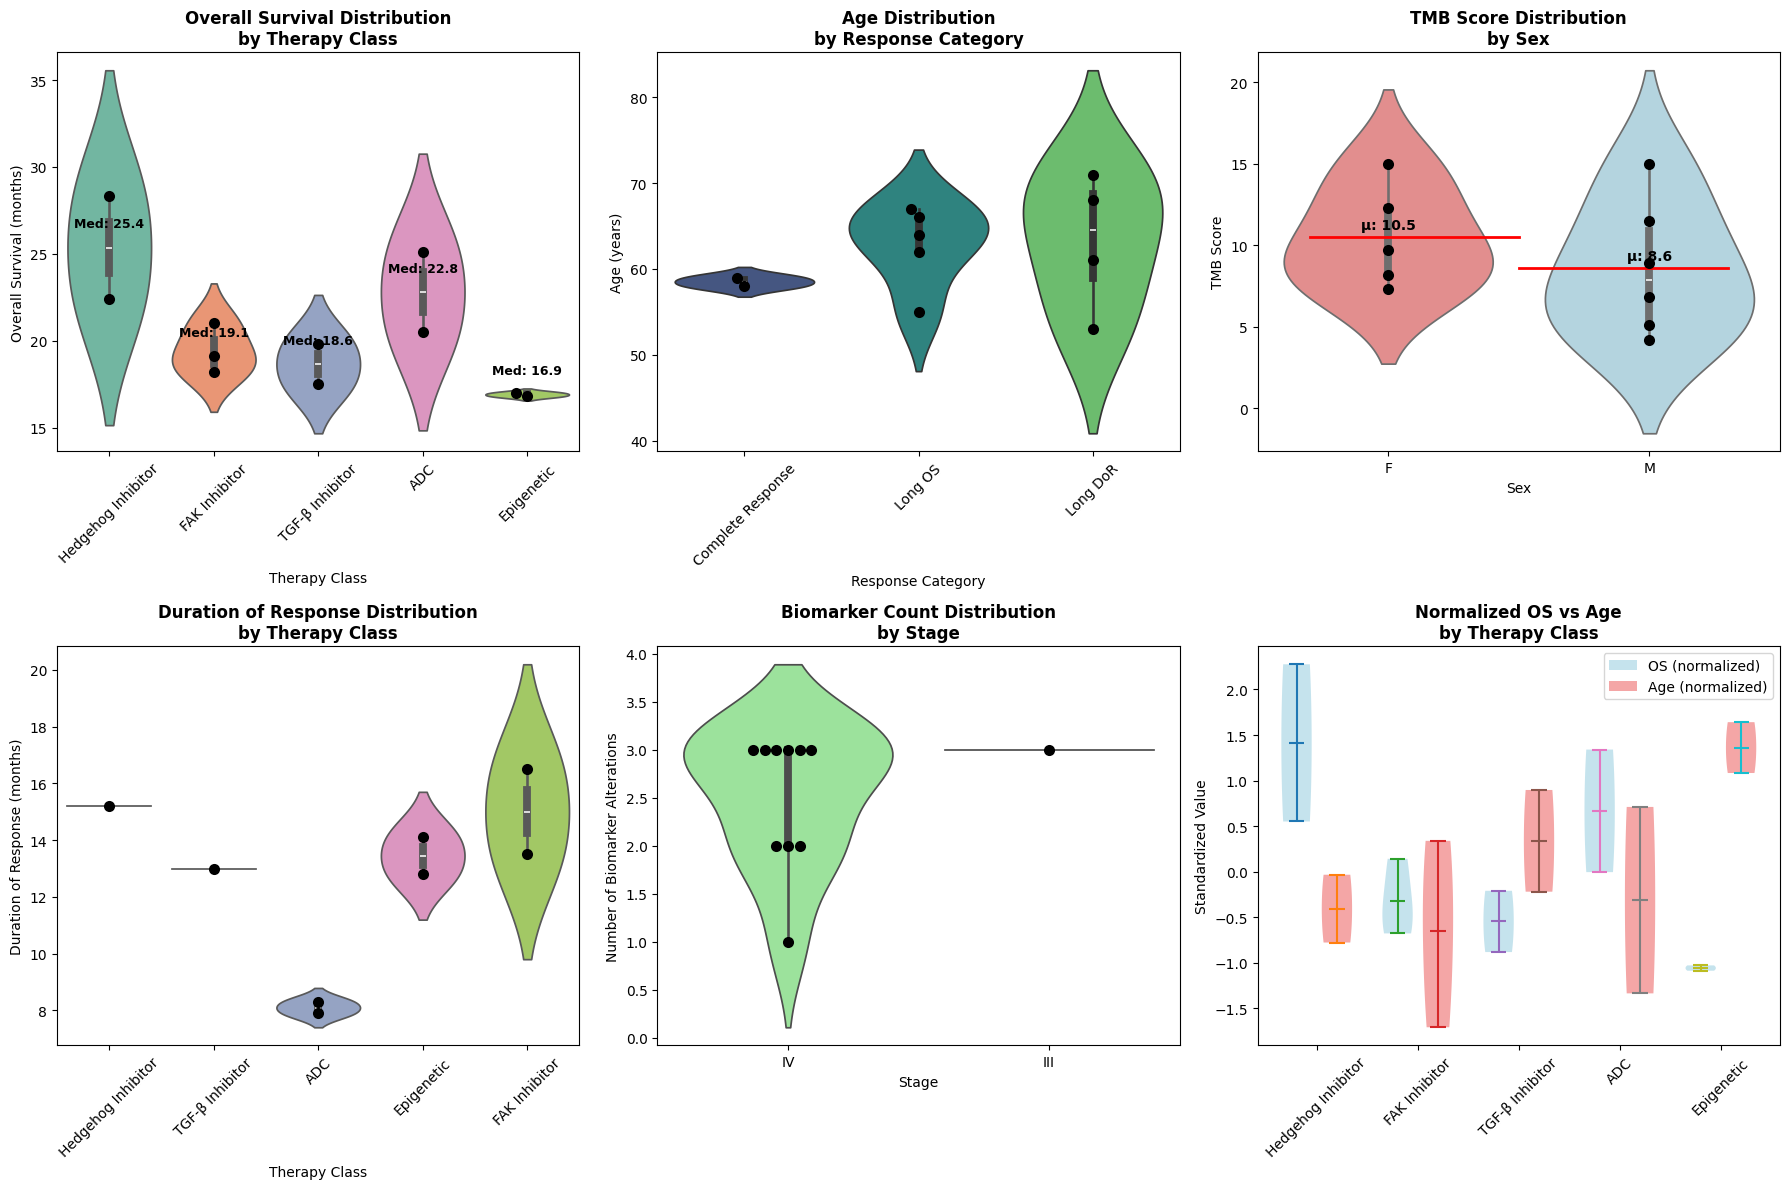

Violin Plot Analysis Summary:

OS Distribution by Therapy Class:
                    count   mean  median   std
Therapy_Class                                 
ADC                     2  22.80   22.80  3.25
Epigenetic              2  16.90   16.90  0.14
FAK Inhibitor           3  19.43   19.10  1.43
Hedgehog Inhibitor      2  25.35   25.35  4.17
TGF-β Inhibitor         2  18.65   18.65  1.63

Age Distribution by Response Category:
                   count   mean  median   std
Response_Category                            
Complete Response      2  58.50    58.5  0.71
Long DoR               4  63.25    64.5  8.02
Long OS                5  62.80    64.0  4.76

TMB Score by Sex:
     count   mean  median   std
Sex                            
F        5  10.50    9.70  3.15
M        6   8.58    7.85  4.11

Statistical Tests:
OS by Therapy Class (Kruskal-Wallis):
H-statistic: 8.167, p-value: 0.086

TMB Score by Sex (Mann-Whitney U):
U-statistic: 9.500, p-value: 0.360


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create comprehensive dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Therapy_Class': ['Hedgehog Inhibitor', 'FAK Inhibitor', 'TGF-β Inhibitor', 'ADC', 'Epigenetic',
                     'Hedgehog Inhibitor', 'FAK Inhibitor', 'ADC', 'Epigenetic', 'TGF-β Inhibitor', 'FAK Inhibitor'],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'DoR_months': [15.2, np.nan, 13.0, 8.3, 14.1, np.nan, 16.5, 7.9, 12.8, np.nan, 13.5],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'Response_Category': ['Complete Response', 'Long OS', 'Long DoR', 'Long OS', 'Long DoR',
                         'Long OS', 'Complete Response', 'Long OS', 'Long DoR', 'Long OS', 'Long DoR'],
    'Stage': ['IV', 'IV', 'IV', 'IV', 'IV', 'III', 'IV', 'IV', 'IV', 'IV', 'IV'],
    'Sex': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M'],
    'TMB_Score': [8.2, 5.1, 6.8, 12.3, 15.0, 4.2, 9.7, 11.5, 15.0, 7.3, 8.9],
    'Biomarker_Count': [3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2]
}

df = pd.DataFrame(data)

# Create figure with multiple violin plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Define color palettes
therapy_palette = sns.color_palette("Set2", len(df['Therapy_Class'].unique()))
response_palette = sns.color_palette("viridis", len(df['Response_Category'].unique()))

# Violin Plot 1: OS by Therapy Class
ax1 = axes[0, 0]
sns.violinplot(data=df, x='Therapy_Class', y='OS_months', palette=therapy_palette, ax=ax1)
sns.swarmplot(data=df, x='Therapy_Class', y='OS_months', color='black', size=8, ax=ax1)
ax1.set_title('Overall Survival Distribution\nby Therapy Class', fontsize=12, fontweight='bold')
ax1.set_xlabel('Therapy Class')
ax1.set_ylabel('Overall Survival (months)')
ax1.tick_params(axis='x', rotation=45)

# Add statistical annotations
for i, therapy in enumerate(df['Therapy_Class'].unique()):
    therapy_data = df[df['Therapy_Class'] == therapy]['OS_months']
    median_val = therapy_data.median()
    ax1.text(i, median_val + 1, f'Med: {median_val:.1f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Violin Plot 2: Age by Response Category
ax2 = axes[0, 1]
sns.violinplot(data=df, x='Response_Category', y='Age', palette=response_palette, ax=ax2)
sns.swarmplot(data=df, x='Response_Category', y='Age', color='black', size=8, ax=ax2)
ax2.set_title('Age Distribution\nby Response Category', fontsize=12, fontweight='bold')
ax2.set_xlabel('Response Category')
ax2.set_ylabel('Age (years)')
ax2.tick_params(axis='x', rotation=45)

# Violin Plot 3: TMB Score by Sex
ax3 = axes[0, 2]
sns.violinplot(data=df, x='Sex', y='TMB_Score', palette=['lightcoral', 'lightblue'], ax=ax3)
sns.swarmplot(data=df, x='Sex', y='TMB_Score', color='black', size=8, ax=ax3)
ax3.set_title('TMB Score Distribution\nby Sex', fontsize=12, fontweight='bold')
ax3.set_xlabel('Sex')
ax3.set_ylabel('TMB Score')

# Add mean lines
for i, sex in enumerate(df['Sex'].unique()):
    sex_data = df[df['Sex'] == sex]['TMB_Score']
    mean_val = sex_data.mean()
    ax3.axhline(y=mean_val, xmin=i*0.4+0.1, xmax=i*0.4+0.5, color='red', linewidth=2)
    ax3.text(i, mean_val + 0.5, f'μ: {mean_val:.1f}', ha='center', fontweight='bold')

# Violin Plot 4: DoR by Therapy Class (excluding NaN)
ax4 = axes[1, 0]
dor_data = df.dropna(subset=['DoR_months'])
sns.violinplot(data=dor_data, x='Therapy_Class', y='DoR_months', palette=therapy_palette, ax=ax4)
sns.swarmplot(data=dor_data, x='Therapy_Class', y='DoR_months', color='black', size=8, ax=ax4)
ax4.set_title('Duration of Response Distribution\nby Therapy Class', fontsize=12, fontweight='bold')
ax4.set_xlabel('Therapy Class')
ax4.set_ylabel('Duration of Response (months)')
ax4.tick_params(axis='x', rotation=45)

# Violin Plot 5: Biomarker Count by Stage
ax5 = axes[1, 1]
sns.violinplot(data=df, x='Stage', y='Biomarker_Count', palette=['lightgreen', 'orange'], ax=ax5)
sns.swarmplot(data=df, x='Stage', y='Biomarker_Count', color='black', size=8, ax=ax5)
ax5.set_title('Biomarker Count Distribution\nby Stage', fontsize=12, fontweight='bold')
ax5.set_xlabel('Stage')
ax5.set_ylabel('Number of Biomarker Alterations')

# Violin Plot 6: Combined OS and Age by Therapy (normalized)
ax6 = axes[1, 2]

# Normalize OS and Age for comparison
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = df.copy()
df_norm[['OS_normalized', 'Age_normalized']] = scaler.fit_transform(df[['OS_months', 'Age']])

# Reshape data for violin plot
os_data = []
age_data = []
therapy_labels = []

for therapy in df['Therapy_Class'].unique():
    therapy_df = df_norm[df_norm['Therapy_Class'] == therapy]
    os_data.extend(therapy_df['OS_normalized'].tolist())
    age_data.extend(therapy_df['Age_normalized'].tolist())
    therapy_labels.extend([f"{therapy}_OS"] * len(therapy_df))
    therapy_labels.extend([f"{therapy}_Age"] * len(therapy_df))

combined_data = pd.DataFrame({
    'Value': os_data + age_data,
    'Metric_Therapy': therapy_labels[:len(os_data)] + therapy_labels[len(os_data):]
})

# Create split violin plot
pos = 0
therapy_positions = {}
for i, therapy in enumerate(df['Therapy_Class'].unique()):
    therapy_positions[therapy] = pos

    # OS violin (left side)
    os_vals = df_norm[df_norm['Therapy_Class'] == therapy]['OS_normalized']
    parts = ax6.violinplot([os_vals], positions=[pos-0.2], widths=0.3, showmeans=True)
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_alpha(0.7)

    # Age violin (right side)
    age_vals = df_norm[df_norm['Therapy_Class'] == therapy]['Age_normalized']
    parts = ax6.violinplot([age_vals], positions=[pos+0.2], widths=0.3, showmeans=True)
    for pc in parts['bodies']:
        pc.set_facecolor('lightcoral')
        pc.set_alpha(0.7)

    pos += 1

ax6.set_xticks(range(len(df['Therapy_Class'].unique())))
ax6.set_xticklabels(df['Therapy_Class'].unique(), rotation=45)
ax6.set_title('Normalized OS vs Age\nby Therapy Class', fontsize=12, fontweight='bold')
ax6.set_ylabel('Standardized Value')

# Add legend for the last plot
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', alpha=0.7, label='OS (normalized)'),
                  Patch(facecolor='lightcoral', alpha=0.7, label='Age (normalized)')]
ax6.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Statistical summary
print("Violin Plot Analysis Summary:")
print("\nOS Distribution by Therapy Class:")
os_stats = df.groupby('Therapy_Class')['OS_months'].agg(['count', 'mean', 'median', 'std'])
print(os_stats.round(2))

print("\nAge Distribution by Response Category:")
age_stats = df.groupby('Response_Category')['Age'].agg(['count', 'mean', 'median', 'std'])
print(age_stats.round(2))

print("\nTMB Score by Sex:")
tmb_stats = df.groupby('Sex')['TMB_Score'].agg(['count', 'mean', 'median', 'std'])
print(tmb_stats.round(2))

# Statistical tests
print("\nStatistical Tests:")
print("OS by Therapy Class (Kruskal-Wallis):")
therapy_groups = [group['OS_months'].values for name, group in df.groupby('Therapy_Class')]
h_stat, p_val = stats.kruskal(*therapy_groups)
print(f"H-statistic: {h_stat:.3f}, p-value: {p_val:.3f}")

print("\nTMB Score by Sex (Mann-Whitney U):")
male_tmb = df[df['Sex'] == 'M']['TMB_Score'].values
female_tmb = df[df['Sex'] == 'F']['TMB_Score'].values
u_stat, p_val = stats.mannwhitneyu(male_tmb, female_tmb, alternative='two-sided')
print(f"U-statistic: {u_stat:.3f}, p-value: {p_val:.3f}")

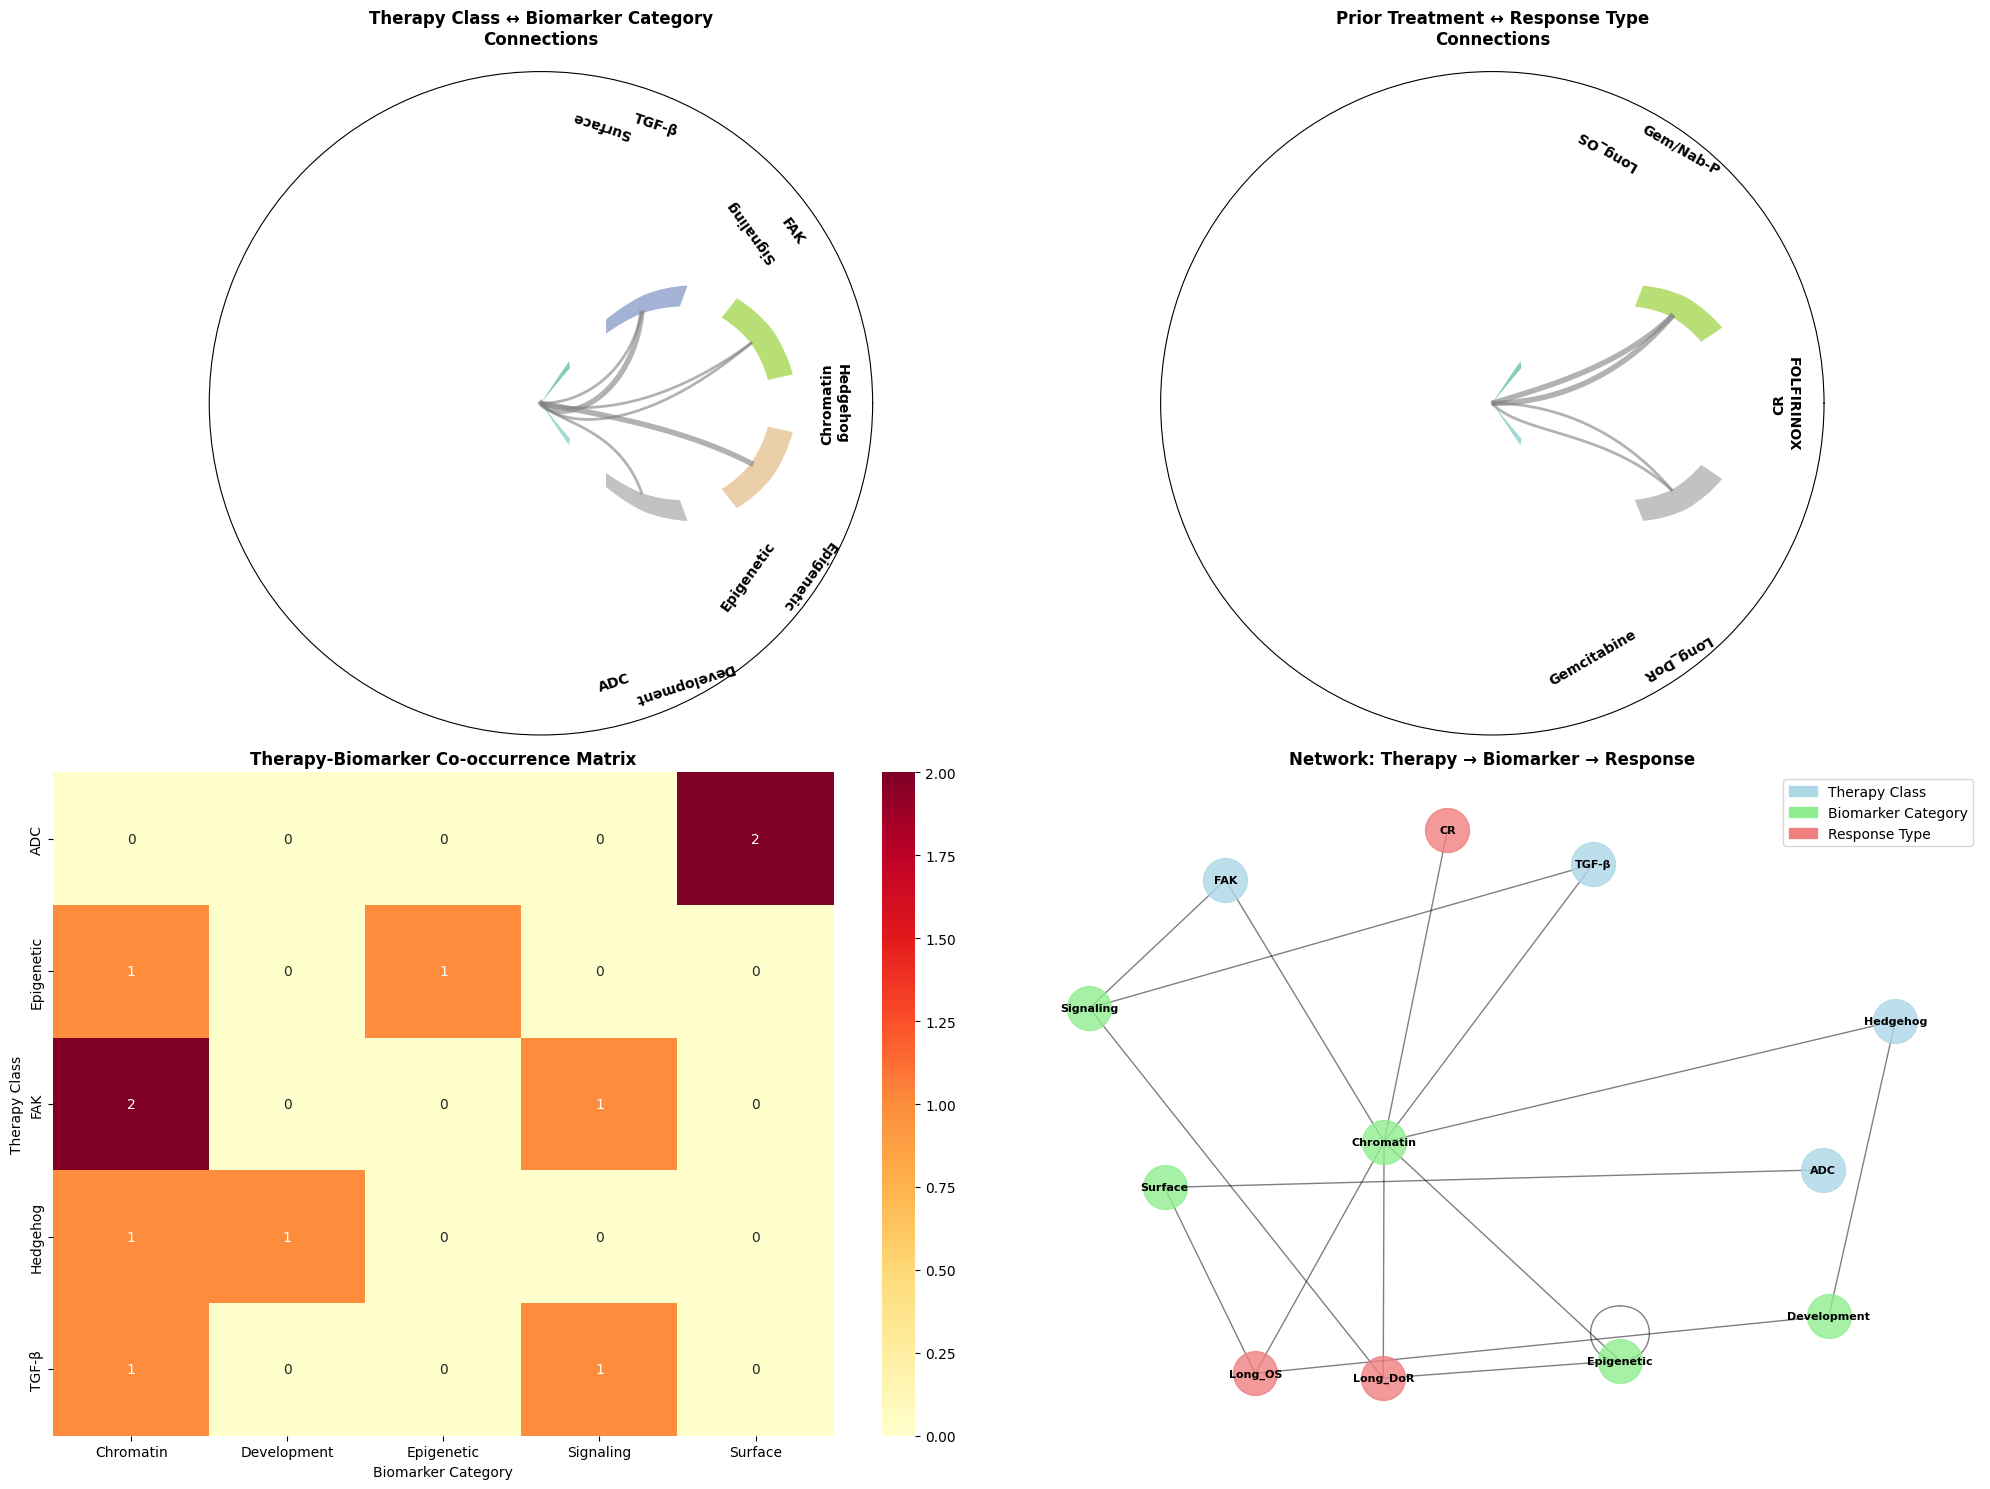

Chord Diagram Analysis:

Therapy-Biomarker Relationships:
ADC - Surface: 2 patients
Epigenetic - Chromatin: 1 patients
Epigenetic - Epigenetic: 1 patients
FAK - Chromatin: 2 patients
FAK - Signaling: 1 patients
Hedgehog - Chromatin: 1 patients
Hedgehog - Development: 1 patients
TGF-β - Chromatin: 1 patients
TGF-β - Signaling: 1 patients

Prior Treatment-Response Relationships:
FOLFIRINOX - CR: 1 patients
FOLFIRINOX - Long_DoR: 1 patients
FOLFIRINOX - Long_OS: 3 patients
Gem/Nab-P - Long_DoR: 2 patients
Gem/Nab-P - Long_OS: 2 patients
Gemcitabine - CR: 1 patients
Gemcitabine - Long_DoR: 1 patients

Network Statistics:
Total nodes: 12
Total edges: 16
Network density: 0.242


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.patches as mpatches

# Create relationship data for chord diagram
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Therapy_Class': ['Hedgehog', 'FAK', 'TGF-β', 'ADC', 'Epigenetic',
                     'Hedgehog', 'FAK', 'ADC', 'Epigenetic', 'TGF-β', 'FAK'],
    'Biomarker_Category': ['Chromatin', 'Chromatin', 'Signaling', 'Surface', 'Chromatin',
                          'Development', 'Chromatin', 'Surface', 'Epigenetic', 'Chromatin', 'Signaling'],
    'Response_Type': ['CR', 'Long_OS', 'Long_DoR', 'Long_OS', 'Long_DoR',
                     'Long_OS', 'CR', 'Long_OS', 'Long_DoR', 'Long_OS', 'Long_DoR'],
    'Prior_Treatment': ['FOLFIRINOX', 'Gem/Nab-P', 'FOLFIRINOX', 'FOLFIRINOX', 'Gemcitabine',
                       'Gem/Nab-P', 'Gemcitabine', 'FOLFIRINOX', 'Gem/Nab-P', 'FOLFIRINOX', 'Gem/Nab-P']
}

df = pd.DataFrame(data)

# Create adjacency matrix for therapy-biomarker relationships
def create_chord_diagram(df, source_col, target_col, title):
    # Get unique categories
    sources = df[source_col].unique()
    targets = df[target_col].unique()
    all_categories = list(sources) + list(targets)
    n_categories = len(all_categories)

    # Create adjacency matrix
    matrix = np.zeros((n_categories, n_categories))

    # Fill matrix with relationships
    for _, row in df.iterrows():
        source_idx = list(all_categories).index(row[source_col])
        target_idx = list(all_categories).index(row[target_col])
        matrix[source_idx, target_idx] += 1
        matrix[target_idx, source_idx] += 1  # Make symmetric

    # Create circular layout
    angles = np.linspace(0, 2*np.pi, n_categories, endpoint=False)

    # Color schemes
    source_colors = plt.cm.Set2(np.linspace(0, 1, len(sources)))
    target_colors = plt.cm.Set3(np.linspace(0, 1, len(targets)))
    colors = list(source_colors) + list(target_colors)

    return matrix, angles, all_categories, colors

# Create figure with multiple chord diagrams
fig = plt.figure(figsize=(20, 15))

# Chord Diagram 1: Therapy Class ↔ Biomarker Category
ax1 = plt.subplot(2, 2, 1, projection='polar')
matrix1, angles1, categories1, colors1 = create_chord_diagram(df, 'Therapy_Class', 'Biomarker_Category',
                                                            'Therapy ↔ Biomarker')

# Draw arcs for categories
radius = 1.0
arc_width = 0.1

for i, (angle, category, color) in enumerate(zip(angles1, categories1, colors1)):
    # Draw category arc
    start_angle = angle - 0.2
    end_angle = angle + 0.2

    arc = mpatches.Wedge((0, 0), radius, np.degrees(start_angle), np.degrees(end_angle),
                        width=arc_width, facecolor=color, alpha=0.8)
    ax1.add_patch(arc)

    # Add labels
    label_angle = angle
    if np.pi/2 < label_angle < 3*np.pi/2:
        label_angle += np.pi
        ha = 'right'
    else:
        ha = 'left'

    ax1.text(label_angle, radius + 0.15, category, rotation=np.degrees(label_angle)-90 if ha=='left' else np.degrees(label_angle)+90,
            ha=ha, va='center', fontsize=10, fontweight='bold')

# Draw connections
for i in range(len(categories1)):
    for j in range(i+1, len(categories1)):
        if matrix1[i, j] > 0:
            # Draw bezier curve between categories
            angle1, angle2 = angles1[i], angles1[j]

            # Calculate control points for smooth curve
            x1, y1 = np.cos(angle1) * 0.9, np.sin(angle1) * 0.9
            x2, y2 = np.cos(angle2) * 0.9, np.sin(angle2) * 0.9

            # Control points for bezier curve
            ctrl_scale = 0.3
            ctrl_x = ctrl_scale * (x1 + x2) / 2
            ctrl_y = ctrl_scale * (y1 + y2) / 2

            # Draw curve
            t = np.linspace(0, 1, 100)
            bezier_x = (1-t)**2 * x1 + 2*(1-t)*t * ctrl_x + t**2 * x2
            bezier_y = (1-t)**2 * y1 + 2*(1-t)*t * ctrl_y + t**2 * y2

            ax1.plot(bezier_x, bezier_y, color='gray', alpha=0.6, linewidth=matrix1[i,j]*2)

ax1.set_ylim(0, 1.3)
ax1.set_title('Therapy Class ↔ Biomarker Category\nConnections', fontsize=12, fontweight='bold', pad=20)
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

# Chord Diagram 2: Prior Treatment ↔ Response Type
ax2 = plt.subplot(2, 2, 2, projection='polar')
matrix2, angles2, categories2, colors2 = create_chord_diagram(df, 'Prior_Treatment', 'Response_Type',
                                                            'Prior Treatment ↔ Response')

# Similar drawing code for second diagram
for i, (angle, category, color) in enumerate(zip(angles2, categories2, colors2)):
    start_angle = angle - 0.2
    end_angle = angle + 0.2

    arc = mpatches.Wedge((0, 0), radius, np.degrees(start_angle), np.degrees(end_angle),
                        width=arc_width, facecolor=color, alpha=0.8)
    ax2.add_patch(arc)

    label_angle = angle
    if np.pi/2 < label_angle < 3*np.pi/2:
        label_angle += np.pi
        ha = 'right'
    else:
        ha = 'left'

    ax2.text(label_angle, radius + 0.15, category, rotation=np.degrees(label_angle)-90 if ha=='left' else np.degrees(label_angle)+90,
            ha=ha, va='center', fontsize=10, fontweight='bold')

for i in range(len(categories2)):
    for j in range(i+1, len(categories2)):
        if matrix2[i, j] > 0:
            angle1, angle2 = angles2[i], angles2[j]
            x1, y1 = np.cos(angle1) * 0.9, np.sin(angle1) * 0.9
            x2, y2 = np.cos(angle2) * 0.9, np.sin(angle2) * 0.9

            ctrl_scale = 0.3
            ctrl_x = ctrl_scale * (x1 + x2) / 2
            ctrl_y = ctrl_scale * (y1 + y2) / 2

            t = np.linspace(0, 1, 100)
            bezier_x = (1-t)**2 * x1 + 2*(1-t)*t * ctrl_x + t**2 * x2
            bezier_y = (1-t)**2 * y1 + 2*(1-t)*t * ctrl_y + t**2 * y2

            ax2.plot(bezier_x, bezier_y, color='gray', alpha=0.6, linewidth=matrix2[i,j]*2)

ax2.set_ylim(0, 1.3)
ax2.set_title('Prior Treatment ↔ Response Type\nConnections', fontsize=12, fontweight='bold', pad=20)
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])

# Matrix visualization 3: Therapy-Biomarker co-occurrence matrix
ax3 = plt.subplot(2, 2, 3)

# Create co-occurrence matrix for heatmap
therapy_biomarker_matrix = pd.crosstab(df['Therapy_Class'], df['Biomarker_Category'])

import seaborn as sns
sns.heatmap(therapy_biomarker_matrix, annot=True, cmap='YlOrRd', fmt='d', ax=ax3)
ax3.set_title('Therapy-Biomarker Co-occurrence Matrix', fontsize=12, fontweight='bold')
ax3.set_xlabel('Biomarker Category')
ax3.set_ylabel('Therapy Class')

# Network-style visualization 4: All relationships
ax4 = plt.subplot(2, 2, 4)

# Create a simpler network visualization
import networkx as nx

G = nx.Graph()

# Add nodes
therapies = df['Therapy_Class'].unique()
biomarkers = df['Biomarker_Category'].unique()
responses = df['Response_Type'].unique()

# Add therapy nodes
for therapy in therapies:
    G.add_node(therapy, node_type='therapy', color='lightblue')

# Add biomarker nodes
for biomarker in biomarkers:
    G.add_node(biomarker, node_type='biomarker', color='lightgreen')

# Add response nodes
for response in responses:
    G.add_node(response, node_type='response', color='lightcoral')

# Add edges based on patient data
for _, row in df.iterrows():
    G.add_edge(row['Therapy_Class'], row['Biomarker_Category'])
    G.add_edge(row['Biomarker_Category'], row['Response_Type'])

# Layout
pos = nx.spring_layout(G, k=2, iterations=50)

# Draw nodes by type
node_colors = {'therapy': 'lightblue', 'biomarker': 'lightgreen', 'response': 'lightcoral'}

for node_type, color in node_colors.items():
    nodes = [node for node in G.nodes() if G.nodes[node]['node_type'] == node_type]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color,
                          node_size=1000, alpha=0.8, ax=ax4)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax4)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold', ax=ax4)

ax4.set_title('Network: Therapy → Biomarker → Response', fontsize=12, fontweight='bold')
ax4.axis('off')

# Add legend
legend_elements = [mpatches.Patch(color='lightblue', label='Therapy Class'),
                  mpatches.Patch(color='lightgreen', label='Biomarker Category'),
                  mpatches.Patch(color='lightcoral', label='Response Type')]
ax4.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

# Print relationship analysis
print("Chord Diagram Analysis:")
print("\nTherapy-Biomarker Relationships:")
therapy_biomarker_counts = df.groupby(['Therapy_Class', 'Biomarker_Category']).size()
for (therapy, biomarker), count in therapy_biomarker_counts.items():
    print(f"{therapy} - {biomarker}: {count} patients")

print("\nPrior Treatment-Response Relationships:")
prior_response_counts = df.groupby(['Prior_Treatment', 'Response_Type']).size()
for (prior, response), count in prior_response_counts.items():
    print(f"{prior} - {response}: {count} patients")

print(f"\nNetwork Statistics:")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")

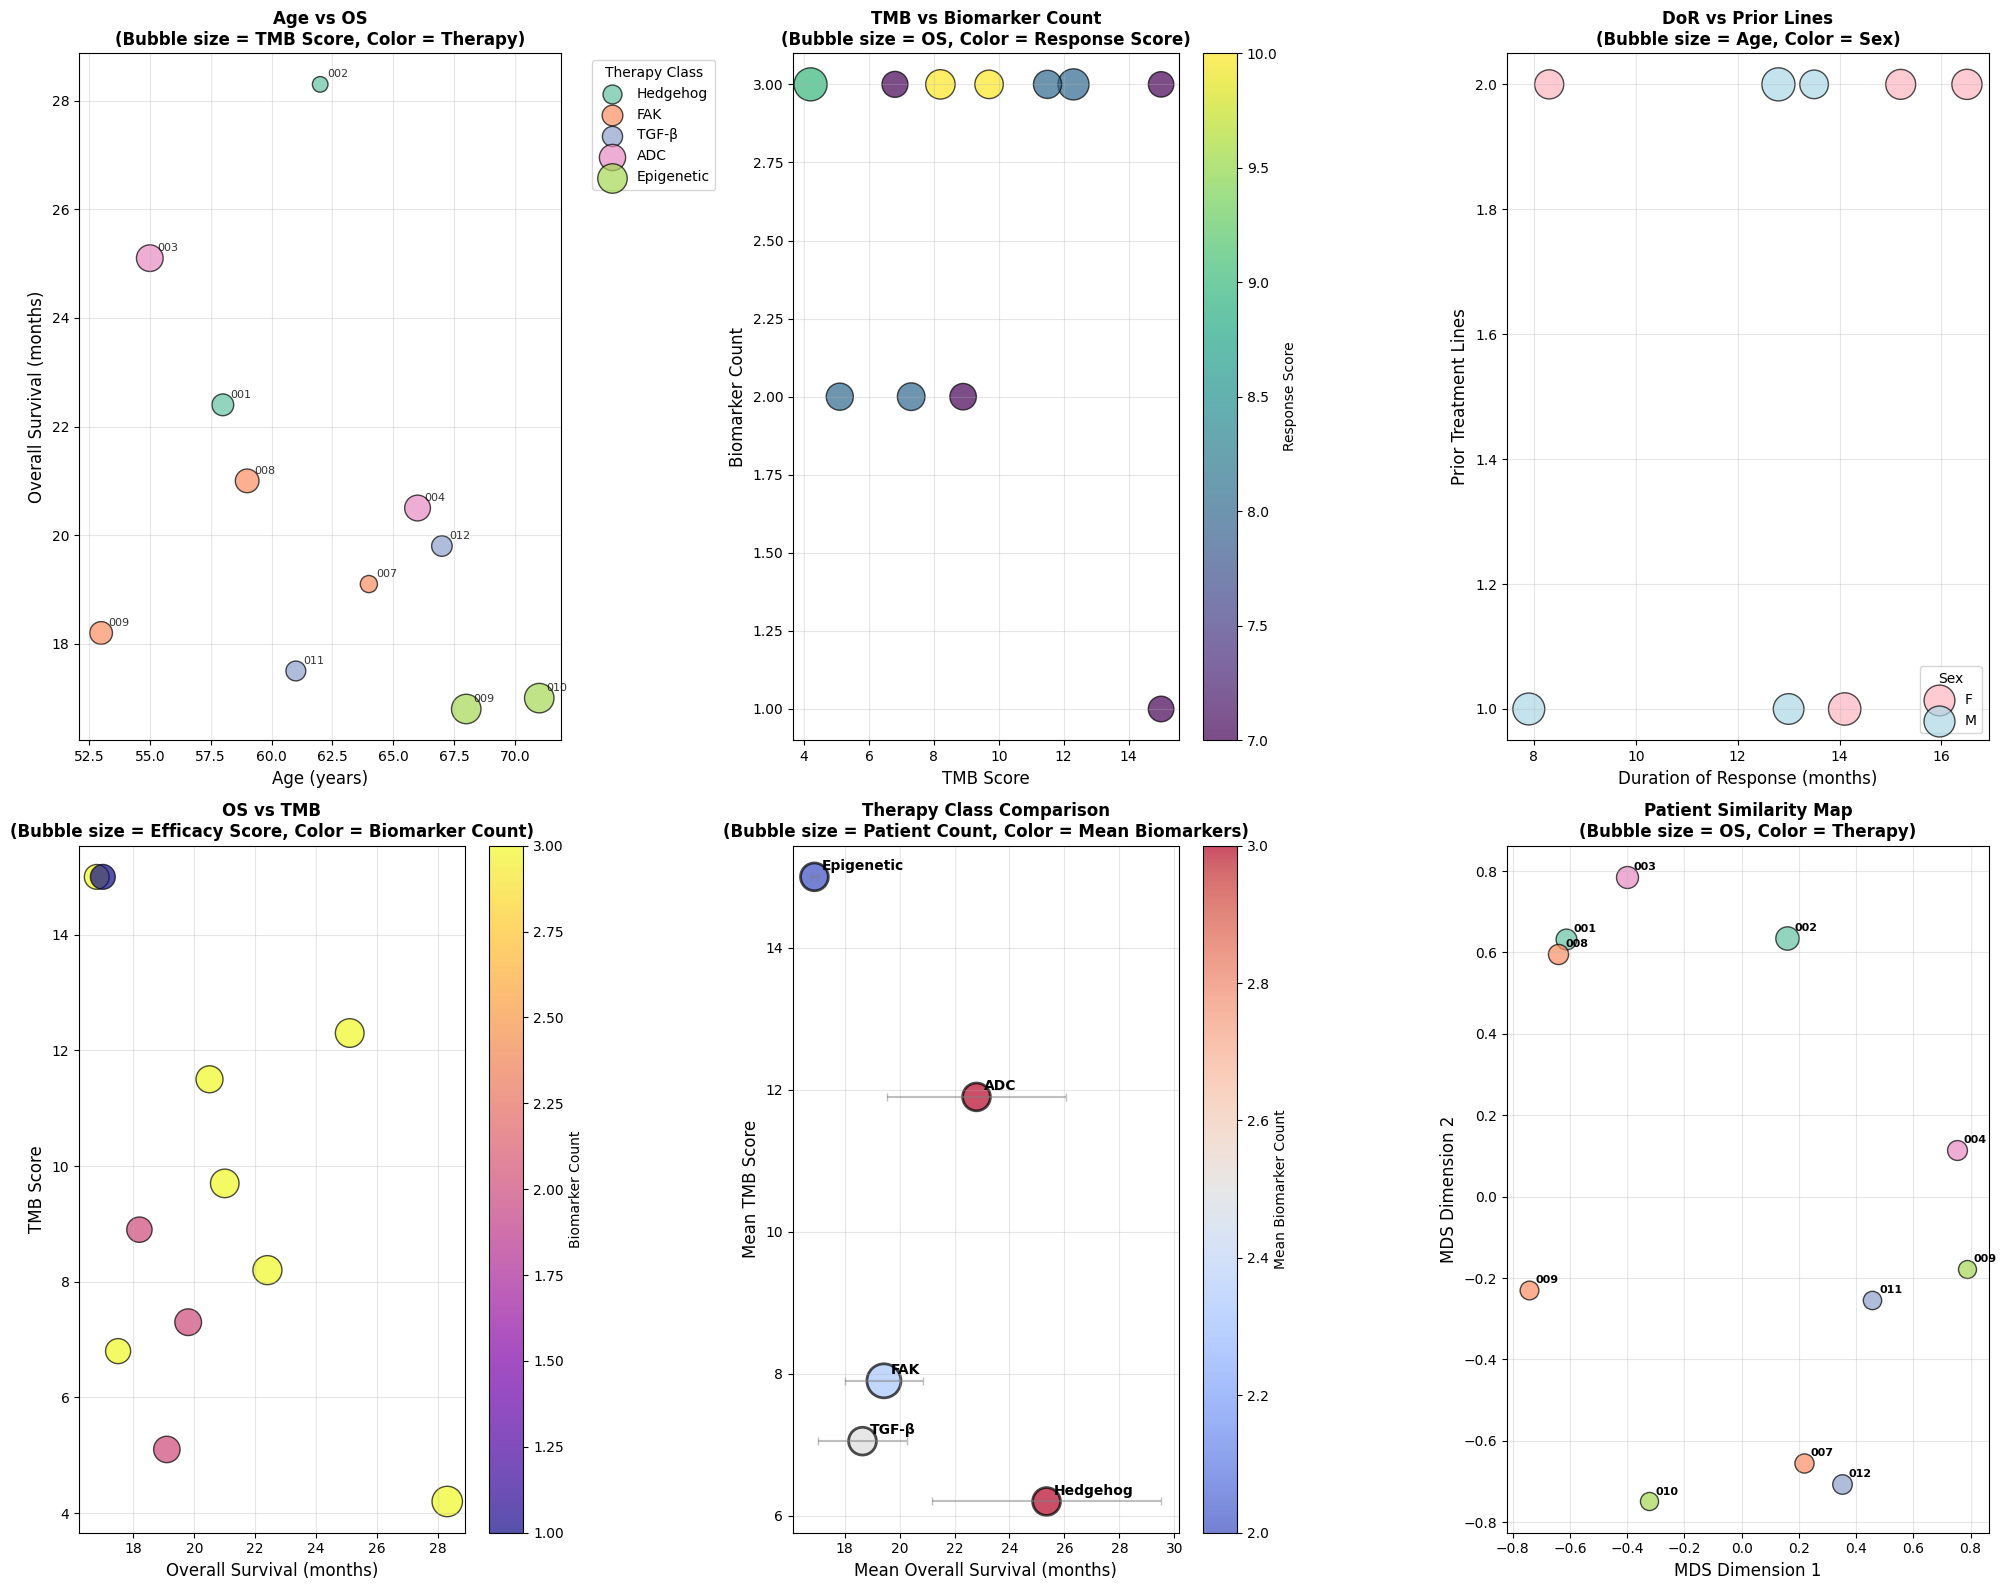

Multi-dimensional Bubble Chart Analysis:

Therapy Class Performance Metrics:
  Therapy_Class  OS_mean  OS_std  TMB_mean  Biomarker_mean  Patient_count
0           ADC    22.80    3.25     11.90            3.00              2
1    Epigenetic    16.90    0.14     15.00            2.00              2
2           FAK    19.43    1.43      7.90            2.33              3
3      Hedgehog    25.35    4.17      6.20            3.00              2
4         TGF-β    18.65    1.63      7.05            2.50              2

Top 3 Most Similar Patient Pairs:
P-HH-001 - P-FAK-008: 0.967
P-FAK-007 - P-TGF-012: 0.882
P-EPI-009 - P-ADC-004: 0.785

Efficacy Score Statistics:
Mean: 75.87
Std: 11.00
Range: 63.62 - 96.00

Highest Efficacy Patients:
P-HH-002: Hedgehog - 96.0
P-HH-001: Hedgehog - 87.5
P-ADC-003: ADC - 85.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

# Create comprehensive dataset
data = {
    'Patient_ID': ['P-HH-001', 'P-FAK-007', 'P-TGF-011', 'P-ADC-003', 'P-EPI-009',
                   'P-HH-002', 'P-FAK-008', 'P-ADC-004', 'P-EPI-010', 'P-TGF-012', 'P-FAK-009'],
    'Age': [58, 64, 61, 55, 68, 62, 59, 66, 71, 67, 53],
    'OS_months': [22.4, 19.1, 17.5, 25.1, 16.8, 28.3, 21.0, 20.5, 17.0, 19.8, 18.2],
    'DoR_months': [15.2, 0, 13.0, 8.3, 14.1, 0, 16.5, 7.9, 12.8, 0, 13.5],  # 0 for missing DoR
    'Therapy_Class': ['Hedgehog', 'FAK', 'TGF-β', 'ADC', 'Epigenetic',
                     'Hedgehog', 'FAK', 'ADC', 'Epigenetic', 'TGF-β', 'FAK'],
    'TMB_Score': [8.2, 5.1, 6.8, 12.3, 15.0, 4.2, 9.7, 11.5, 15.0, 7.3, 8.9],
    'Biomarker_Count': [3, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2],
    'Prior_Lines': [2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2],
    'Response_Score': [10, 8, 7, 8, 7, 9, 10, 8, 7, 8, 7],  # Composite response score
    'Sex': ['F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M'],
    'Stage_Numeric': [4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4]
}

df = pd.DataFrame(data)

# Create figure with multiple bubble chart views
fig = plt.figure(figsize=(20, 16))

# Bubble Chart 1: Age vs OS, bubble size = TMB, color = Therapy
ax1 = plt.subplot(2, 3, 1)

therapy_colors = plt.cm.Set2(range(len(df['Therapy_Class'].unique())))
therapy_color_map = dict(zip(df['Therapy_Class'].unique(), therapy_colors))

for therapy in df['Therapy_Class'].unique():
    therapy_data = df[df['Therapy_Class'] == therapy]
    scatter = ax1.scatter(therapy_data['Age'], therapy_data['OS_months'],
                         s=therapy_data['TMB_Score']*30,
                         c=[therapy_color_map[therapy]],
                         alpha=0.7, label=therapy, edgecolors='black', linewidth=1)

ax1.set_xlabel('Age (years)', fontsize=12)
ax1.set_ylabel('Overall Survival (months)', fontsize=12)
ax1.set_title('Age vs OS\n(Bubble size = TMB Score, Color = Therapy)', fontsize=12, fontweight='bold')
ax1.legend(title='Therapy Class', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Add patient ID annotations
for _, row in df.iterrows():
    ax1.annotate(row['Patient_ID'].split('-')[-1],
                (row['Age'], row['OS_months']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

# Bubble Chart 2: TMB vs Biomarker Count, bubble size = OS, color = Response Score
ax2 = plt.subplot(2, 3, 2)

scatter = ax2.scatter(df['TMB_Score'], df['Biomarker_Count'],
                     s=df['OS_months']*20,
                     c=df['Response_Score'],
                     cmap='viridis', alpha=0.7, edgecolors='black', linewidth=1)

ax2.set_xlabel('TMB Score', fontsize=12)
ax2.set_ylabel('Biomarker Count', fontsize=12)
ax2.set_title('TMB vs Biomarker Count\n(Bubble size = OS, Color = Response Score)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Response Score', fontsize=10)

# Bubble Chart 3: DoR vs Prior Lines, bubble size = Age, color = Sex
ax3 = plt.subplot(2, 3, 3)

# Filter out patients with DoR = 0
dor_data = df[df['DoR_months'] > 0]

sex_colors = {'M': 'lightblue', 'F': 'lightpink'}
for sex in dor_data['Sex'].unique():
    sex_data = dor_data[dor_data['Sex'] == sex]
    ax3.scatter(sex_data['DoR_months'], sex_data['Prior_Lines'],
               s=sex_data['Age']*8,
               c=sex_colors[sex],
               alpha=0.7, label=sex, edgecolors='black', linewidth=1)

ax3.set_xlabel('Duration of Response (months)', fontsize=12)
ax3.set_ylabel('Prior Treatment Lines', fontsize=12)
ax3.set_title('DoR vs Prior Lines\n(Bubble size = Age, Color = Sex)', fontsize=12, fontweight='bold')
ax3.legend(title='Sex')
ax3.grid(True, alpha=0.3)

# Bubble Chart 4: Multi-dimensional view with all variables
ax4 = plt.subplot(2, 3, 4)

# Create composite efficacy score
df['Efficacy_Score'] = (df['OS_months'] / df['OS_months'].max() * 0.6 +
                       df['Response_Score'] / df['Response_Score'].max() * 0.4) * 100

# Plot OS vs TMB with multiple dimensions
scatter = ax4.scatter(df['OS_months'], df['TMB_Score'],
                     s=df['Efficacy_Score']*5,
                     c=df['Biomarker_Count'],
                     cmap='plasma', alpha=0.7, edgecolors='black', linewidth=1)

ax4.set_xlabel('Overall Survival (months)', fontsize=12)
ax4.set_ylabel('TMB Score', fontsize=12)
ax4.set_title('OS vs TMB\n(Bubble size = Efficacy Score, Color = Biomarker Count)',
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

cbar4 = plt.colorbar(scatter, ax=ax4)
cbar4.set_label('Biomarker Count', fontsize=10)

# Bubble Chart 5: Therapy comparison matrix
ax5 = plt.subplot(2, 3, 5)

# Create therapy performance metrics
therapy_metrics = df.groupby('Therapy_Class').agg({
    'OS_months': ['mean', 'std'],
    'TMB_Score': 'mean',
    'Biomarker_Count': 'mean',
    'Patient_ID': 'count'
}).round(2)

therapy_metrics.columns = ['OS_mean', 'OS_std', 'TMB_mean', 'Biomarker_mean', 'Patient_count']
therapy_metrics = therapy_metrics.reset_index()

scatter = ax5.scatter(therapy_metrics['OS_mean'], therapy_metrics['TMB_mean'],
                     s=therapy_metrics['Patient_count']*200,
                     c=therapy_metrics['Biomarker_mean'],
                     cmap='coolwarm', alpha=0.7, edgecolors='black', linewidth=2)

# Add therapy labels
for _, row in therapy_metrics.iterrows():
    ax5.annotate(row['Therapy_Class'],
                (row['OS_mean'], row['TMB_mean']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

# Add error bars
ax5.errorbar(therapy_metrics['OS_mean'], therapy_metrics['TMB_mean'],
            xerr=therapy_metrics['OS_std'], fmt='none',
            ecolor='gray', alpha=0.5, capsize=3)

ax5.set_xlabel('Mean Overall Survival (months)', fontsize=12)
ax5.set_ylabel('Mean TMB Score', fontsize=12)
ax5.set_title('Therapy Class Comparison\n(Bubble size = Patient Count, Color = Mean Biomarkers)',
              fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

cbar5 = plt.colorbar(scatter, ax=ax5)
cbar5.set_label('Mean Biomarker Count', fontsize=10)

# Bubble Chart 6: Patient similarity matrix
ax6 = plt.subplot(2, 3, 6)

# Calculate patient similarity based on multiple features
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select features for similarity calculation
features = ['Age', 'OS_months', 'TMB_Score', 'Biomarker_Count', 'Prior_Lines', 'Response_Score']
feature_data = df[features]

# Standardize features
scaler = StandardScaler()
feature_data_scaled = scaler.fit_transform(feature_data)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(feature_data_scaled)

# Create MDS plot for patient similarity
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
dissimilarity_matrix = 1 - similarity_matrix
mds_coords = mds.fit_transform(dissimilarity_matrix)

# Plot MDS results
for i, (x, y) in enumerate(mds_coords):
    therapy = df.iloc[i]['Therapy_Class']
    ax6.scatter(x, y, s=df.iloc[i]['OS_months']*10,
               c=therapy_color_map[therapy],
               alpha=0.7, edgecolors='black', linewidth=1)
    ax6.annotate(df.iloc[i]['Patient_ID'].split('-')[-1],
                (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=8, fontweight='bold')

ax6.set_xlabel('MDS Dimension 1', fontsize=12)
ax6.set_ylabel('MDS Dimension 2', fontsize=12)
ax6.set_title('Patient Similarity Map\n(Bubble size = OS, Color = Therapy)',
              fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print bubble chart analysis
print("Multi-dimensional Bubble Chart Analysis:")
print("\nTherapy Class Performance Metrics:")
print(therapy_metrics)

print("\nTop 3 Most Similar Patient Pairs:")
# Find most similar patients
similarity_pairs = []
for i in range(len(similarity_matrix)):
    for j in range(i+1, len(similarity_matrix)):
        similarity_pairs.append((i, j, similarity_matrix[i, j]))

similarity_pairs.sort(key=lambda x: x[2], reverse=True)
for i, j, sim in similarity_pairs[:3]:
    patient1 = df.iloc[i]['Patient_ID']
    patient2 = df.iloc[j]['Patient_ID']
    print(f"{patient1} - {patient2}: {sim:.3f}")

print(f"\nEfficacy Score Statistics:")
print(f"Mean: {df['Efficacy_Score'].mean():.2f}")
print(f"Std: {df['Efficacy_Score'].std():.2f}")
print(f"Range: {df['Efficacy_Score'].min():.2f} - {df['Efficacy_Score'].max():.2f}")

print(f"\nHighest Efficacy Patients:")
top_efficacy = df.nlargest(3, 'Efficacy_Score')[['Patient_ID', 'Therapy_Class', 'Efficacy_Score']]
for _, row in top_efficacy.iterrows():
    print(f"{row['Patient_ID']}: {row['Therapy_Class']} - {row['Efficacy_Score']:.1f}")